<a href="https://colab.research.google.com/github/bhanu0925/DL_Patient_Survival_Prediction_BinaryClassification/blob/main/DL_Patients_Survival_Prediction_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patient Survival Prediction

Getting a rapid understanding of the context of a patient’s overall health has been particularly important during the COVID-19 pandemic as healthcare workers around the world struggle with hospitals overloaded by patients in critical condition. Intensive Care Units (ICUs) often lack verified medical histories for incoming patients. A patient in distress or a patient who is brought in confused or unresponsive may not be able to provide information about chronic conditions such as heart disease, injuries, or diabetes. Medical records may take days to transfer, especially for a patient from another medical provider or system. Knowledge about chronic conditions can inform clinical decisions about patient care and ultimately improve patient's survival outcomes.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
ROOT = "/content/drive/MyDrive/ML/DL"
os.chdir(ROOT)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

## Loading the Data

In [5]:
df_dic = pd.read_csv('Data.csv')
df_dic

Category                Variable Name Unit of Measure  \
0                   identifier                 encounter_id            None   
1                   identifier                  hospital_id            None   
2                   identifier                   patient_id            None   
3                  demographic               hospital_death            None   
4                  demographic                          age           Years   
..                         ...                          ...             ...   
183         APACHE comorbidity                     lymphoma            None   
184         APACHE comorbidity  solid_tumor_with_metastasis            None   
185            APACHE grouping         apache_3j_bodysystem            None   
186            APACHE grouping          apache_2_bodysystem            None   
187  GOSSIS example prediction                         pred            None   

    Data Type                                        Description  \
0     integer  Unique identifier associated with a patient un...   
1     integer       Unique identifier associated with a hospital   
2     integer        Unique identifier associated with a patient   
3      binary  Whether the patient died during this hospitali...   
4     numeric           The age of the patient on unit admission   
..        ...                                                ...   
183    binary  Whether the patient has been diagnosed with no...   
184    binary  Whether the patient has been diagnosed with an...   
185    string           Admission diagnosis group for APACHE III   
186    string            Admission diagnosis group for APACHE II   
187   numeric  Example mortality prediction, shared as a 'bas...   

            Example  
0              None  
1              None  
2              None  
3                 0  
4              None  
..              ...  
183               1  
184               1  
185  Cardiovascular  
186     Respiratory  
187        0.000921  

[188 rows x 6 columns]

In [6]:
## Loading the data
pd.set_option('display.max_columns', None)
df_pat = pd.read_csv('patient.csv')
df_pat.head(5)


encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache

In [7]:
df_pat.shape

(91713, 186)

In [8]:
df_pat.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   hospital_admit_source          70304 non-null  object 
 11   icu_admit_source               91601 non-null  object 
 12   icu_id                        

## Missing values

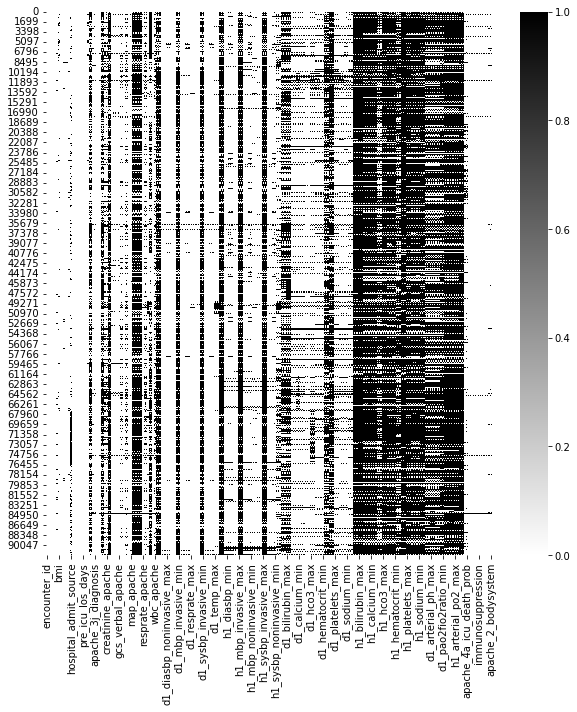

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df_pat.isnull(),cmap='binary')

 Looks like there are lot of missing data


In [10]:
def findMissingPercentage(df):
  cols = []
  per = []
  miss_val_col = []

  for col in df.columns:
      cols.append(col)
      pert = (df[col].isnull().sum()/df.shape[0])*100
      per.append(pert)
      if df[col].isnull().sum() > 0:
          miss_val_col.append(col)        
  df_null_pert = pd.DataFrame({"columns" : cols, "Percentage" : per})
  return df_null_pert

In [11]:
df_null_pert = findMissingPercentage(df_pat)

In [12]:
mask = df_null_pert['Percentage'] >= 15
missing_more_than_20per_col = df_null_pert[mask]['columns'].values
df_null_pert[mask]

columns  Percentage
10   hospital_admit_source   23.343474
18          albumin_apache   59.292576
23        bilirubin_apache   63.386870
24              bun_apache   21.002475
25       creatinine_apache   20.556519
..                     ...         ...
169     h1_arterial_ph_min   83.329517
170    h1_arterial_po2_max   82.807236
171    h1_arterial_po2_min   82.807236
172   h1_pao2fio2ratio_max   87.441257
173   h1_pao2fio2ratio_min   87.441257

[84 rows x 2 columns]

In [13]:
missing_more_than_20per_col

array(['hospital_admit_source', 'albumin_apache', 'bilirubin_apache',
       'bun_apache', 'creatinine_apache', 'fio2_apache',
       'hematocrit_apache', 'paco2_apache', 'paco2_for_ph_apache',
       'pao2_apache', 'ph_apache', 'sodium_apache', 'urineoutput_apache',
       'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min',
       'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min',
       'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_temp_max',
       'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min',
       'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_hco3_max',
       'd1_hco3_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max',
       'd1_lactate_min', 'h1_albumin_max', 'h1_albumin_min',
       'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min',
       'h1_calcium_max', 'h1_calcium_min'

## Dropping columns with more than 15% of missing data

In [14]:
df_reduced = df_pat.drop(columns=missing_more_than_20per_col)

In [15]:
df_reduced

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             66154       25312          118               0  68.0  22.730000   
1            114252       59342           81               0  77.0  27.420000   
2            119783       50777          118               0  25.0  31.950000   
3             79267       46918          118               0  81.0  22.640000   
4             92056       34377           33               0  19.0        NaN   
...             ...         ...          ...             ...   ...        ...   
91708         91592       78108           30               0  75.0  23.060250   
91709         66119       13486          121               0  56.0  47.179671   
91710          8981       58179          195               0  48.0  27.236914   
91711         33776      120598           66               0   NaN  23.297481   
91712          1671       53612          104               0  82.0  22.031250   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
0                     0  Caucasian      M   180.3                      Floor   
1                     0  Caucasian      F   160.0                      Floor   
2                     0  Caucasian      F   172.7       Accident & Emergency   
3                     1  Caucasian      F   165.1  Operating Room / Recovery   
4                     0  Caucasian      M   188.0       Accident & Emergency   
...                 ...        ...    ...     ...                        ...   
91708                 0  Caucasian      M   177.8                      Floor   
91709                 0  Caucasian      F   183.0                      Floor   
91710                 0  Caucasian      M   170.2       Accident & Emergency   
91711                 0  Caucasian      F   154.9       Accident & Emergency   
91712                 1  Caucasian      F   160.0  Operating Room / Recovery   

       icu_id icu_stay_type      icu_type  pre_icu_los_days  \
0          92         admit         CTICU          0.541667   
1          90         admit  Med-Surg ICU          0.927778   
2          93         admit  Med-Surg ICU          0.000694   
3          92         admit         CTICU          0.000694   
4          91         admit  Med-Surg ICU          0.073611   
...       ...           ...           ...               ...   
91708     927         admit   Cardiac ICU          0.298611   
91709     925         admit  Med-Surg ICU          0.120139   
91710     908         admit  Med-Surg ICU          0.046528   
91711     922         admit  Med-Surg ICU          0.081944   
91712     926         admit  Med-Surg ICU          0.018056   

       readmission_status  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0                       0    73.9               113.0               502.01   
1                       0    70.2               108.0               203.01   
2                       0    95.3               122.0               703.03   
3                       0    61.7               203.0              1206.03   
4                       0     NaN               119.0               601.01   
...                   ...     ...                 ...                  ...   
91708                   0    72.9               113.0               501.06   
91709                   0   158.0               113.0               501.05   
91710                   0    78.9               123.0               702.01   
91711                   0    55.9               108.0               203.01   
91712                   0    56.4               304.0              1409.02   

       apache_post_operative  arf_apache  gcs_eyes_apache  gcs_motor_apache  \
0                          0         0.0              3.0               6.0   
1                          0         0.0              1.0               3.0   
2                          0         0.0              3.0               6.0   
3                          1         0.0              4.0      

In [16]:
df_reduced.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 102 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   91713 non-null  int64  
 1    patient_id                     91713 non-null  int64  
 2    hospital_id                    91713 non-null  int64  
 3    hospital_death                 91713 non-null  int64  
 4    age                            87485 non-null  float64
 5    bmi                            88284 non-null  float64
 6    elective_surgery               91713 non-null  int64  
 7    ethnicity                      90318 non-null  object 
 8    gender                         91688 non-null  object 
 9    height                         90379 non-null  float64
 10   icu_admit_source               91601 non-null  object 
 11   icu_id                         91713 non-null  int64  
 12   icu_stay_type                 

In [17]:
df_null_per_reduced = findMissingPercentage(df_reduced)
df_null_per_reduced 

columns  Percentage
0                   encounter_id    0.000000
1                     patient_id    0.000000
2                    hospital_id    0.000000
3                 hospital_death    0.000000
4                            age    4.610033
..                           ...         ...
97                      leukemia    0.779606
98                      lymphoma    0.779606
99   solid_tumor_with_metastasis    0.779606
100         apache_3j_bodysystem    1.812175
101          apache_2_bodysystem    1.812175

[102 rows x 2 columns]

Column with no missing values

In [18]:
mask = df_null_per_reduced['Percentage'] == 0
no_missing_values  = df_null_per_reduced[mask]['columns'].values
df_null_per_reduced[mask]

columns  Percentage
0            encounter_id         0.0
1              patient_id         0.0
2             hospital_id         0.0
3          hospital_death         0.0
6        elective_surgery         0.0
11                 icu_id         0.0
12          icu_stay_type         0.0
13               icu_type         0.0
14       pre_icu_los_days         0.0
15     readmission_status         0.0
19  apache_post_operative         0.0

In [19]:
no_missing_values

array(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death',
       'elective_surgery', 'icu_id', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'readmission_status', 'apache_post_operative'],
      dtype=object)

## Column with cardinality = 1

In [20]:
col_with_one_cardinality = [col for col in df_reduced if df_reduced[col].nunique()==1]
col_with_one_cardinality

['readmission_status']

In [21]:
df_reduced['readmission_status'].unique()[0]

0

### Lets see the unique values of all the column values

In [22]:
for col in df_reduced:
  print(f"col --> {col}---> {df_reduced[col].unique()}")

col --> encounter_id---> [ 66154 114252 119783 ...   8981  33776   1671]
col --> patient_id---> [ 25312  59342  50777 ...  58179 120598  53612]
col --> hospital_id---> [118  81  33  83  77 149  31 151  69  46  63 113 137  89 168 150 140  34
  74 102  91 198 129   4 124  68 138 174 134 169  57 177 155  85  78  95
  98 105  76   5 116 119  79 171 161 128 147 112  32  55  17 136  44 179
  88  23 130  72 109  10 204 117 202  70 160  62  16 199  54 100 186  20
 107  14 132  87  53  21  99  71 182  24 200 189  60  84  26 133  27   8
 194 111 176 187  39 101  80  90  19  94  50 192  43 145 180  40   9  93
 185 159 166 157  64 125  92  13  37 139 135  51  18 181 158 196  47 103
 197  38 188   2  49 142  35  15 146  29  36 167  30 184 104 121 195   3
   6 183  66]
col --> hospital_death---> [0 1]
col --> age---> [68. 77. 25. 81. 19. 67. 59. 70. 45. 50. 72. 80. 48. 65. 78. 30. 46. 39.
 79. 58. 87. 60. 85. nan 76. 53. 71. 82. 52. 75. 64. 55. 73. 88. 84. 62.
 56. 38. 41. 35. 54. 74. 49. 86. 51. 63

In [23]:
df_reduced.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 102, dtype: int64

### Deleting few columns which does not contribute in predicting the patients servival

In [24]:
df_reduced.drop(columns=['encounter_id','patient_id','hospital_id','readmission_status','icu_id'],axis = 1,inplace=True)

In [25]:
df_reduced

hospital_death   age        bmi  elective_surgery  ethnicity gender  \
0                   0  68.0  22.730000                 0  Caucasian      M   
1                   0  77.0  27.420000                 0  Caucasian      F   
2                   0  25.0  31.950000                 0  Caucasian      F   
3                   0  81.0  22.640000                 1  Caucasian      F   
4                   0  19.0        NaN                 0  Caucasian      M   
...               ...   ...        ...               ...        ...    ...   
91708               0  75.0  23.060250                 0  Caucasian      M   
91709               0  56.0  47.179671                 0  Caucasian      F   
91710               0  48.0  27.236914                 0  Caucasian      M   
91711               0   NaN  23.297481                 0  Caucasian      F   
91712               0  82.0  22.031250                 1  Caucasian      F   

       height           icu_admit_source icu_stay_type      icu_type  \
0       180.3                      Floor         admit         CTICU   
1       160.0                      Floor         admit  Med-Surg ICU   
2       172.7       Accident & Emergency         admit  Med-Surg ICU   
3       165.1  Operating Room / Recovery         admit         CTICU   
4       188.0       Accident & Emergency         admit  Med-Surg ICU   
...       ...                        ...           ...           ...   
91708   177.8                      Floor         admit   Cardiac ICU   
91709   183.0                      Floor         admit  Med-Surg ICU   
91710   170.2       Accident & Emergency         admit  Med-Surg ICU   
91711   154.9       Accident & Emergency         admit  Med-Surg ICU   
91712   160.0  Operating Room / Recovery         admit  Med-Surg ICU   

       pre_icu_los_days  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0              0.541667    73.9               113.0               502.01   
1              0.927778    70.2               108.0               203.01   
2              0.000694    95.3               122.0               703.03   
3              0.000694    61.7               203.0              1206.03   
4              0.073611     NaN               119.0               601.01   
...                 ...     ...                 ...                  ...   
91708          0.298611    72.9               113.0               501.06   
91709          0.120139   158.0               113.0               501.05   
91710          0.046528    78.9               123.0               702.01   
91711          0.081944    55.9               108.0               203.01   
91712          0.018056    56.4               304.0              1409.02   

       apache_post_operative  arf_apache  gcs_eyes_apache  gcs_motor_apache  \
0                          0         0.0              3.0               6.0   
1                          0         0.0              1.0               3.0   
2                          0         0.0              3.0               6.0   
3                          1         0.0              4.0               6.0   
4                          0         0.0              NaN               NaN   
...                      ...         ...              ...               ...   
91708                      0         0.0              4.0               6.0   
91709                      0         0.0              4.0               6.0   
91710                      0         0.0              3.0               6.0   
91711                      0         0.0              4.0               5.0   
91712                      1         0.0              4.0               6.0   

       gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
0                    0.0                4.0           168.0   
1                    0.0                1.0           145.0   
2                    0.0                5.0             NaN   
3                    0.0                5.0           185.0   
4                    NaN    

## Check for Duplicated

In [26]:
df_reduced[df_reduced.duplicated()]

Empty DataFrame
Columns: [hospital_death, age, bmi, elective_surgery, ethnicity, gender, height, icu_admit_source, icu_stay_type, icu_type, pre_icu_los_days, weight, apache_2_diagnosis, apache_3j_diagnosis, apache_post_operative, arf_apache, gcs_eyes_apache, gcs_motor_apache, gcs_unable_apache, gcs_verbal_apache, glucose_apache, heart_rate_apache, intubated_apache, map_apache, resprate_apache, temp_apache, ventilated_apache, d1_diasbp_max, d1_diasbp_min, d1_diasbp_noninvasive_max, d1_diasbp_noninvasive_min, d1_heartrate_max, d1_heartrate_min, d1_mbp_max, d1_mbp_min, d1_mbp_noninvasive_max, d1_mbp_noninvasive_min, d1_resprate_max, d1_resprate_min, d1_spo2_max, d1_spo2_min, d1_sysbp_max, d1_sysbp_min, d1_sysbp_noninvasive_max, d1_sysbp_noninvasive_min, d1_temp_max, d1_temp_min, h1_diasbp_max, h1_diasbp_min, h1_diasbp_noninvasive_max, h1_diasbp_noninvasive_min, h1_heartrate_max, h1_heartrate_min, h1_mbp_max, h1_mbp_min, h1_mbp_noninvasive_max, h1_mbp_noninvasive_min, h1_resprate_max, h1_resprate_min, h1_spo2_max, h1_spo2_min, h1_sysbp_max, h1_sysbp_min, h1_sysbp_noninvasive_max, h1_sysbp_noninvasive_min, d1_bun_max, d1_bun_min, d1_calcium_max, d1_calcium_min, d1_creatinine_max, d1_creatinine_min, d1_glucose_max, d1_glucose_min, d1_hemaglobin_max, d1_hemaglobin_min, d1_hematocrit_max, d1_hematocrit_min, d1_platelets_max, d1_platelets_min, d1_potassium_max, d1_potassium_min, d1_sodium_max, d1_sodium_min, d1_wbc_max, d1_wbc_min, apache_4a_hospital_death_prob, apache_4a_icu_death_prob, aids, cirrhosis, diabetes_mellitus, hepatic_failure, immunosuppression, leukemia, lymphoma, solid_tumor_with_metastasis, apache_3j_bodysystem, apache_2_bodysystem]
Index: []

In [27]:
df_reduced.isnull().sum()

hospital_death                    0
age                            4228
bmi                            3429
elective_surgery                  0
ethnicity                      1395
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 97, dtype: int64

In [28]:
df_reduced[df_reduced.isna().any(axis=1)]

hospital_death   age        bmi  elective_surgery         ethnicity  \
2                   0  25.0  31.950000                 0         Caucasian   
3                   0  81.0  22.640000                 1         Caucasian   
4                   0  19.0        NaN                 0         Caucasian   
6                   0  59.0  57.450000                 0         Caucasian   
7                   0  70.0        NaN                 0         Caucasian   
...               ...   ...        ...               ...               ...   
91704               0  38.0  32.992923                 0         Caucasian   
91705               0  67.0  28.876843                 0  African American   
91707               0   NaN  33.933518                 0         Caucasian   
91710               0  48.0  27.236914                 0         Caucasian   
91711               0   NaN  23.297481                 0         Caucasian   

      gender  height           icu_admit_source icu_stay_type      icu_type  \
2          F   172.7       Accident & Emergency         admit  Med-Surg ICU   
3          F   165.1  Operating Room / Recovery         admit         CTICU   
4          M   188.0       Accident & Emergency         admit  Med-Surg ICU   
6          F   165.1       Accident & Emergency         admit  Med-Surg ICU   
7          M   165.0       Accident & Emergency         admit  Med-Surg ICU   
...      ...     ...                        ...           ...           ...   
91704      M   177.8       Accident & Emergency         admit   Cardiac ICU   
91705      M   182.9       Accident & Emergency         admit  Med-Surg ICU   
91707      F   152.0       Accident & Emergency         admit  Med-Surg ICU   
91710      M   170.2       Accident & Emergency         admit  Med-Surg ICU   
91711      F   154.9       Accident & Emergency         admit  Med-Surg ICU   

       pre_icu_los_days  weight  apache_2_diagnosis  apache_3j_diagnosis  \
2              0.000694    95.3               122.0               703.03   
3              0.000694    61.7               203.0              1206.03   
4              0.073611     NaN               119.0               601.01   
6              0.000694   156.6               108.0               203.01   
7              0.002083     NaN               113.0               501.05   
...                 ...     ...                 ...                  ...   
91704          0.015972   104.3               307.0               704.07   
91705          0.213194    96.6               123.0               702.01   
91707         -3.593056    78.4                 NaN                  NaN   
91710          0.046528    78.9               123.0               702.01   
91711          0.081944    55.9               108.0               203.01   

       apache_post_operative  arf_apache  gcs_eyes_apache  gcs_motor_apache  \
2                          0         0.0              3.0               6.0   
3                          1         0.0              4.0               6.0   
4                          0         0.0              NaN               NaN   
6                          0         0.0              4.0               6.0   
7                          0         0.0              4.0               6.0   
...                      ...         ...              ...               ...   
91704                      0         1.0              4.0               6.0   
91705                      0         0.0              4.0               6.0   
91707                      0         NaN              NaN               NaN   
91710                      0         0.0              3.0               6.0   
91711                      0         0.0              4.0               5.0   

       gcs_unable_apache  gcs_verbal_apache  glucose_apache  \
2                    0.0                5.0             NaN   
3                    0.0                5.0           185.0   
4                    NaN                NaN             NaN   
6      

50% of the observation has missing values

## Data Visualization

### Visualize categorical columns and numeric colummns

In [29]:
cat_col = df_reduced.select_dtypes(include='object').columns
cat_col

Index(['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'apache_3j_bodysystem', 'apache_2_bodysystem'],
      dtype='object')

In [30]:
df_reduced[cat_col]

ethnicity gender           icu_admit_source icu_stay_type  \
0      Caucasian      M                      Floor         admit   
1      Caucasian      F                      Floor         admit   
2      Caucasian      F       Accident & Emergency         admit   
3      Caucasian      F  Operating Room / Recovery         admit   
4      Caucasian      M       Accident & Emergency         admit   
...          ...    ...                        ...           ...   
91708  Caucasian      M                      Floor         admit   
91709  Caucasian      F                      Floor         admit   
91710  Caucasian      M       Accident & Emergency         admit   
91711  Caucasian      F       Accident & Emergency         admit   
91712  Caucasian      F  Operating Room / Recovery         admit   

           icu_type apache_3j_bodysystem apache_2_bodysystem  
0             CTICU               Sepsis      Cardiovascular  
1      Med-Surg ICU          Respiratory         Respiratory  
2      Med-Surg ICU            Metabolic           Metabolic  
3             CTICU       Cardiovascular      Cardiovascular  
4      Med-Surg ICU               Trauma              Trauma  
...             ...                  ...                 ...  
91708   Cardiac ICU               Sepsis      Cardiovascular  
91709  Med-Surg ICU               Sepsis      Cardiovascular  
91710  Med-Surg ICU            Metabolic           Metabolic  
91711  Med-Surg ICU          Respiratory         Respiratory  
91712  Med-Surg ICU     Gastrointestinal    Gastrointestinal  

[91713 rows x 7 columns]

In [31]:
df_reduced[cat_col].isnull().sum()

ethnicity               1395
gender                    25
icu_admit_source         112
icu_stay_type              0
icu_type                   0
apache_3j_bodysystem    1662
apache_2_bodysystem     1662
dtype: int64

In [32]:
def catDistribution(df,col_name):
    print(f"null Value : {df[col_name].isnull().sum()}")
    print(f"Unique values - {df[col_name].unique()}")
    sns.countplot(x=df[col_name])
    plt.xticks(rotation=90);
    plt.show()

In [37]:

pd.set_option('display.max_rows', None)
df_reduced.nunique()

hospital_death                       2
age                                 74
bmi                              34888
elective_surgery                     2
ethnicity                            6
gender                               2
height                             401
icu_admit_source                     5
icu_stay_type                        3
icu_type                             8
pre_icu_los_days                  9757
weight                            3409
apache_2_diagnosis                  44
apache_3j_diagnosis                399
apache_post_operative                2
arf_apache                           2
gcs_eyes_apache                      4
gcs_motor_apache                     6
gcs_unable_apache                    2
gcs_verbal_apache                    5
glucose_apache                     565
heart_rate_apache                  149
intubated_apache                     2
map_apache                         161
resprate_apache                     74
temp_apache              

null Value : 1395
Unique values - ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


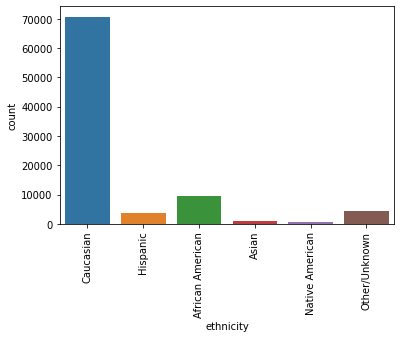

null Value : 25
Unique values - ['M' 'F' nan]


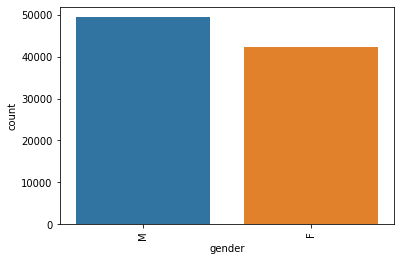

null Value : 112
Unique values - ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]


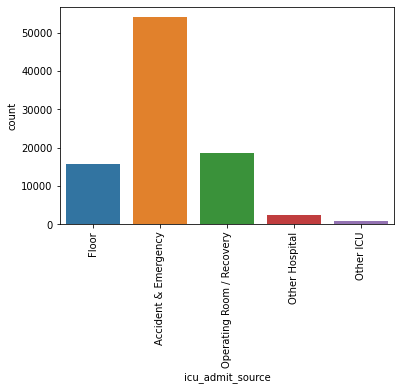

null Value : 0
Unique values - ['admit' 'readmit' 'transfer']


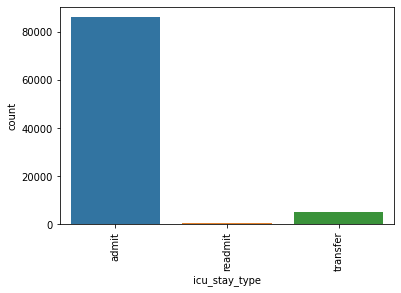

null Value : 0
Unique values - ['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']


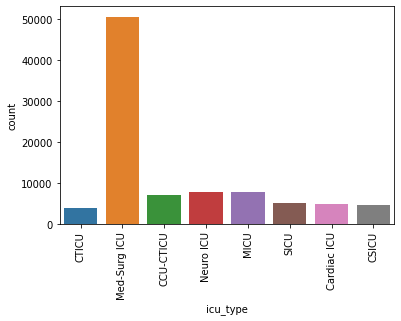

null Value : 1662
Unique values - ['Sepsis' 'Respiratory' 'Metabolic' 'Cardiovascular' 'Trauma'
 'Neurological' 'Gastrointestinal' 'Genitourinary' nan 'Hematological'
 'Musculoskeletal/Skin' 'Gynecological']


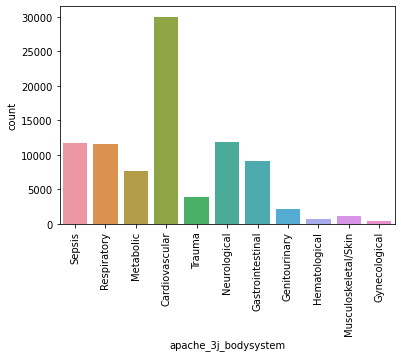

null Value : 1662
Unique values - ['Cardiovascular' 'Respiratory' 'Metabolic' 'Trauma' 'Neurologic'
 'Gastrointestinal' 'Renal/Genitourinary' nan 'Undefined diagnoses'
 'Haematologic' 'Undefined Diagnoses']


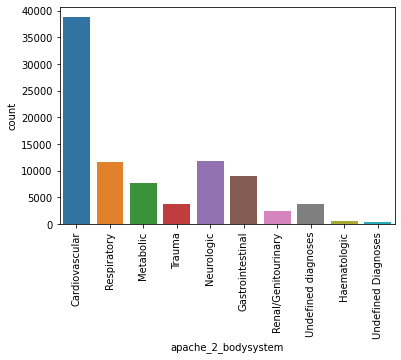

In [ ]:
for col in df_reduced[cat_col]:
  catDistribution(df_reduced,col)


In [ ]:
df_reduced[cat_col].describe()

ethnicity gender      icu_admit_source icu_stay_type      icu_type  \
count       90318  91688                 91601         91713         91713   
unique          6      2                     5             3             8   
top     Caucasian      M  Accident & Emergency         admit  Med-Surg ICU   
freq        70684  49469                 54060         86183         50586   

       apache_3j_bodysystem apache_2_bodysystem  
count                 90051               90051  
unique                   11                  10  
top          Cardiovascular      Cardiovascular  
freq                  29999               38816

1. we have missing values in categories.
2. highest ethnicity is Caucasian
3. Most of the patiens are males, its almost 50%
4. Most of the icu admits are due to Accident and emergency
5. More admited patients
6. ICU type Med_Surg ICU has more admits of patients
7. Most of the dodysystem is Cardiovascular 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


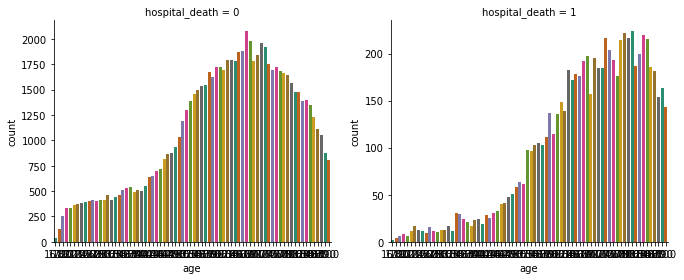

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


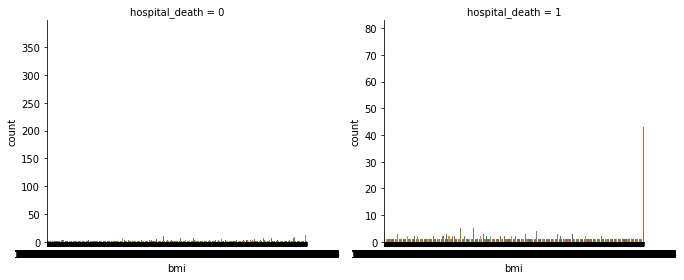

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


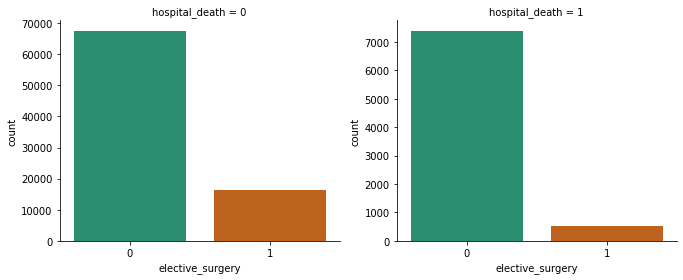

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


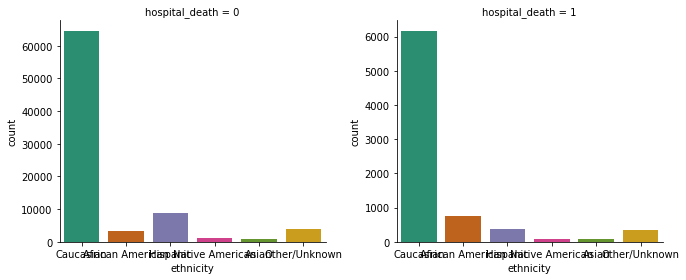

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


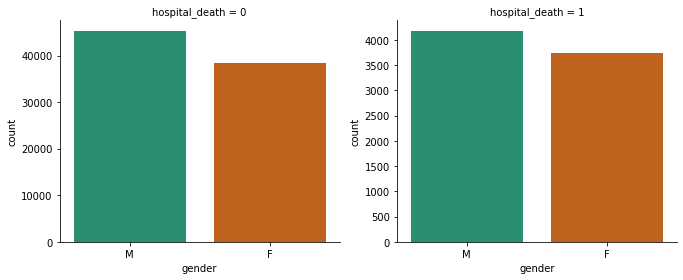

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


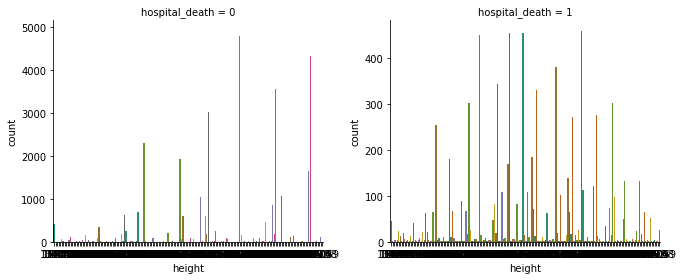

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


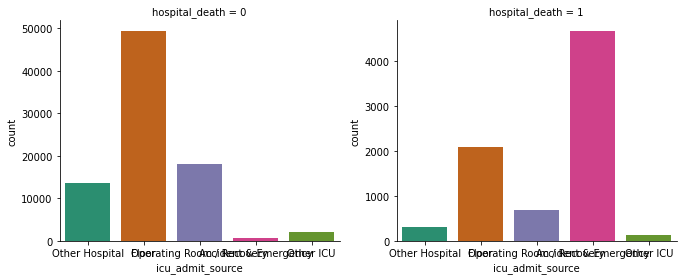

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


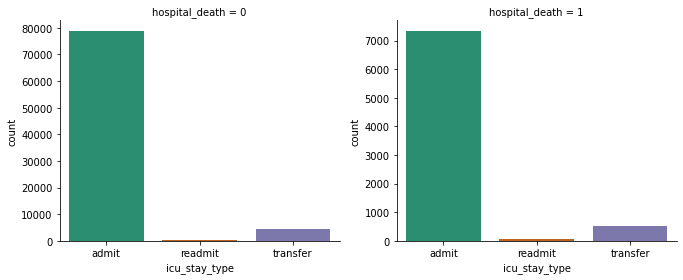

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


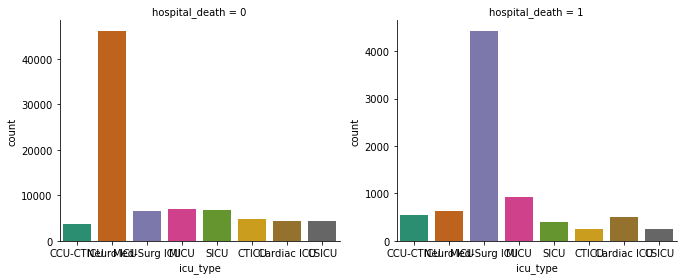

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


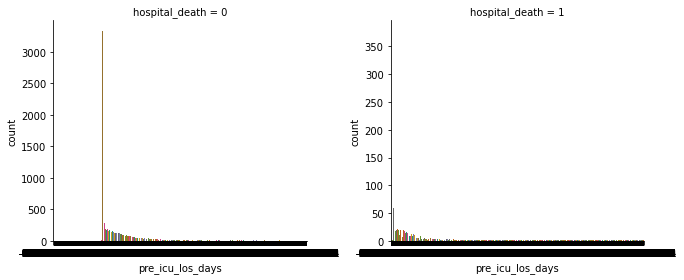

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


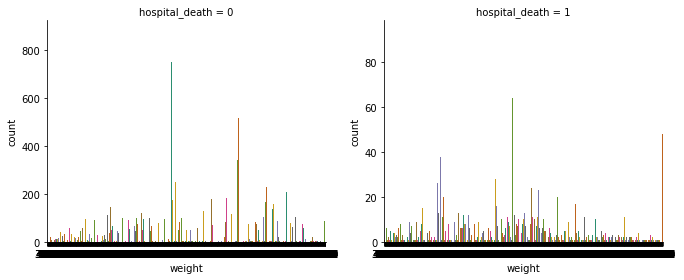

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


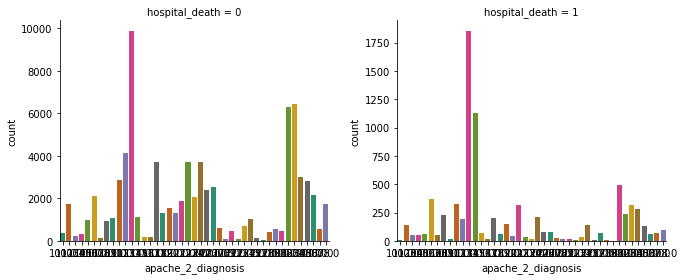

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


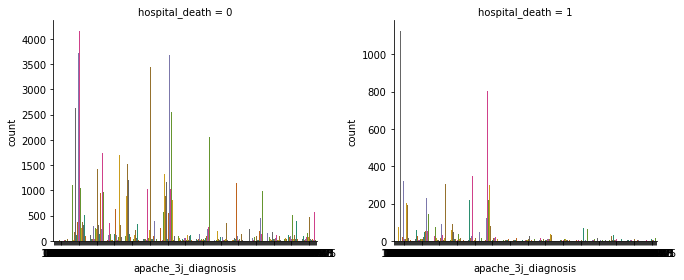

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


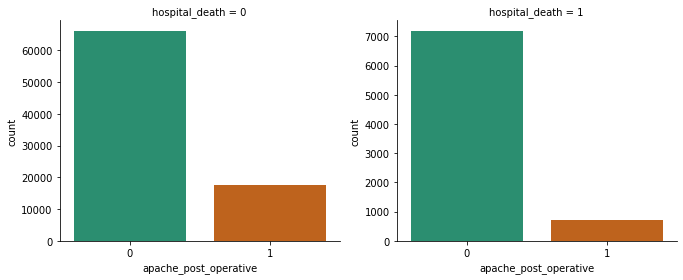

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


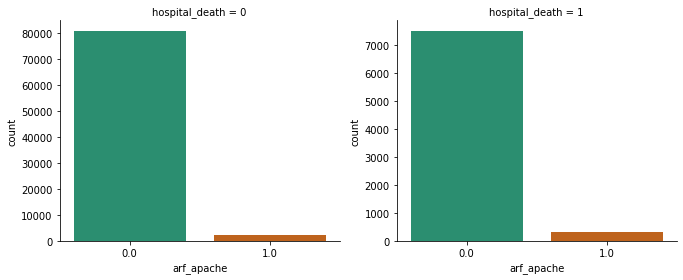

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


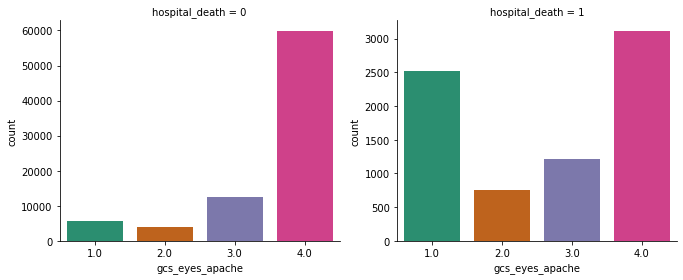

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


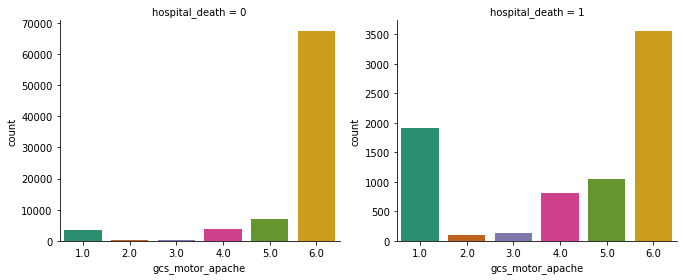

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


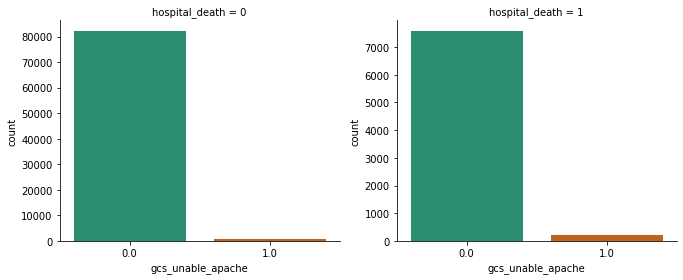

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


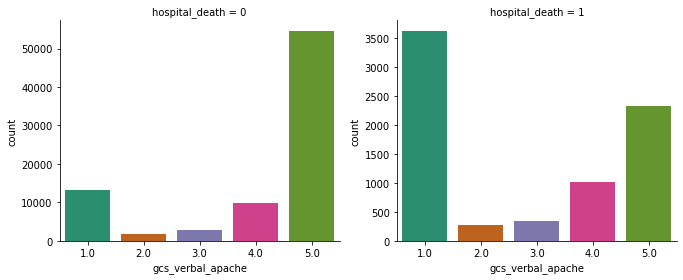

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


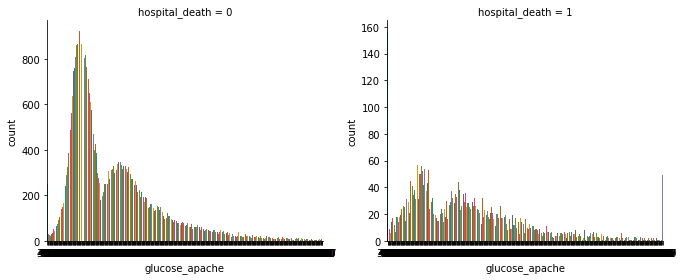

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


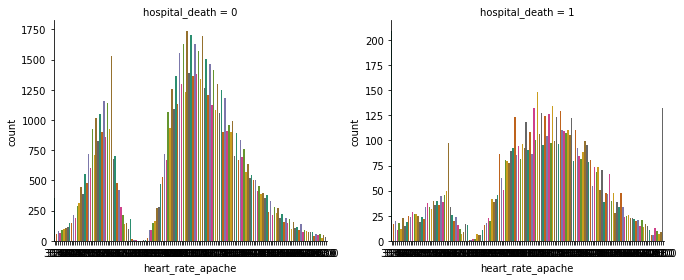

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


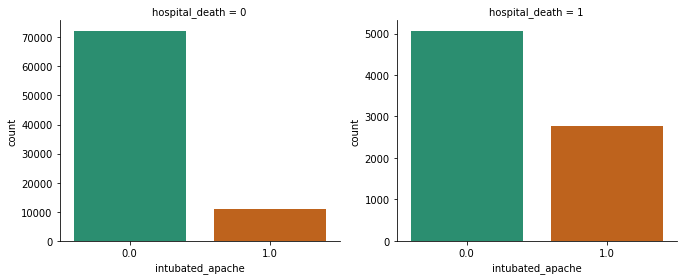

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


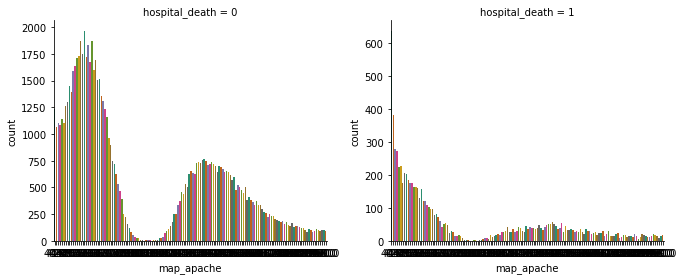

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


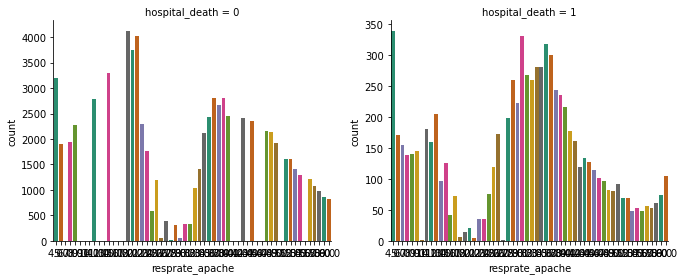

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


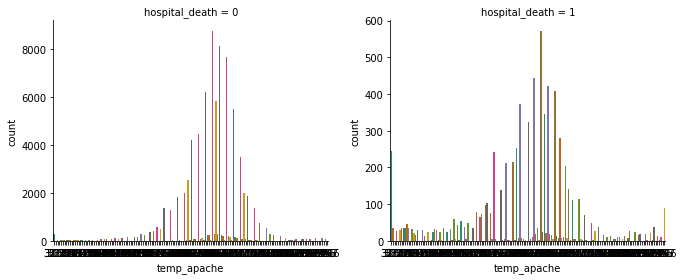

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


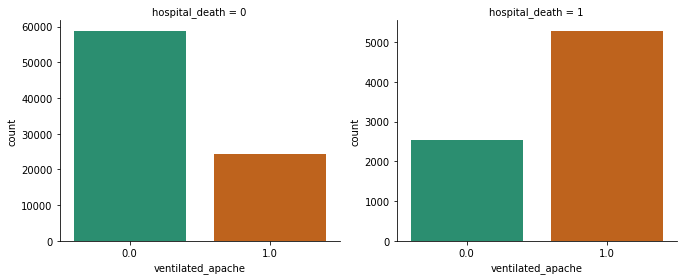

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


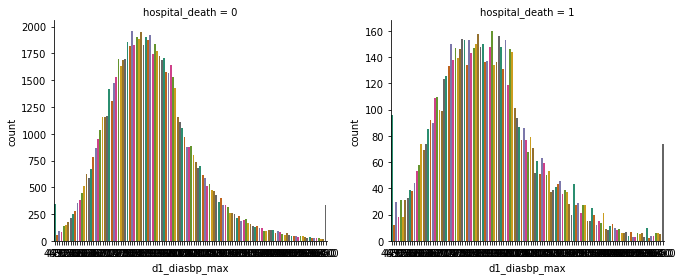

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


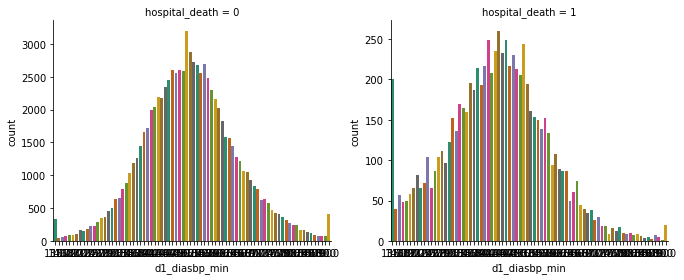

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


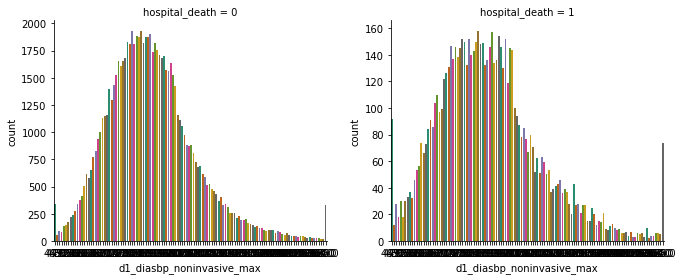

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


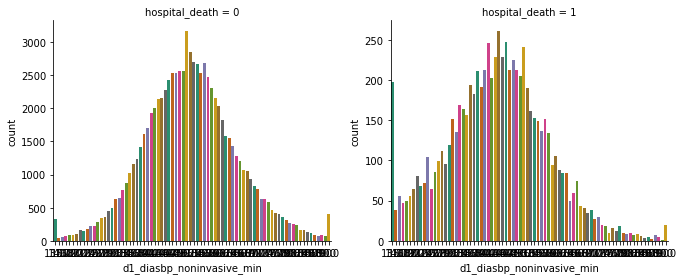

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


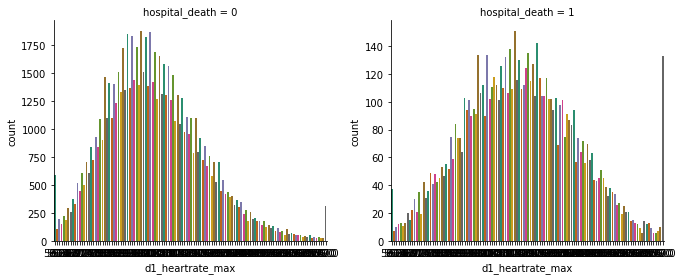

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


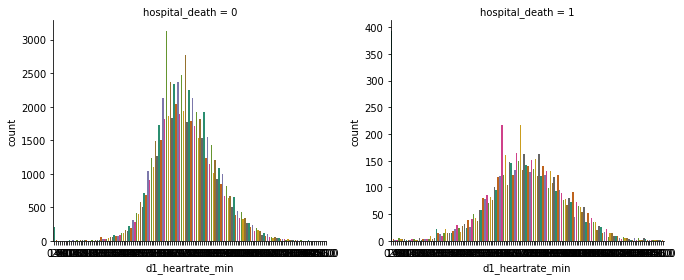

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


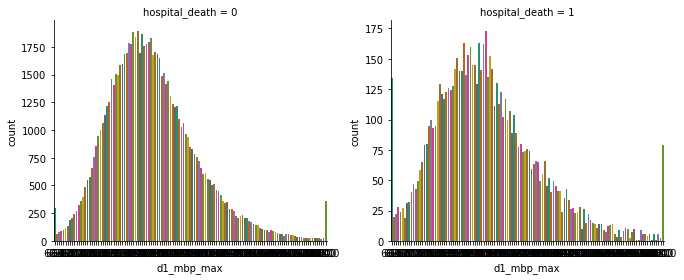

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


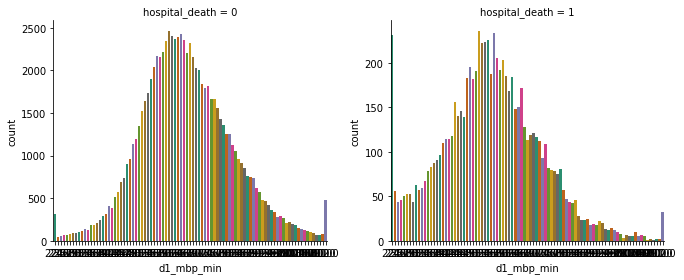

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


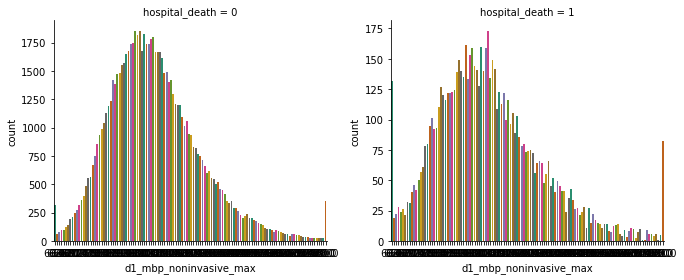

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


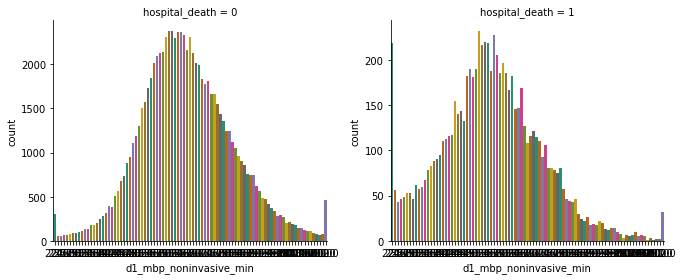

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


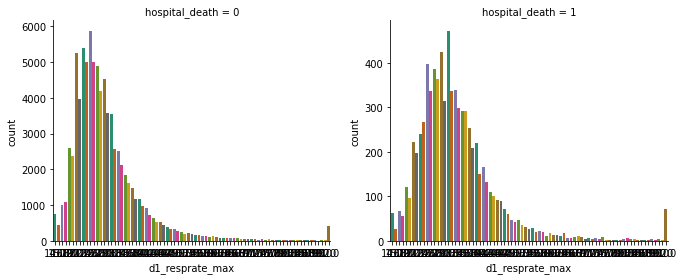

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


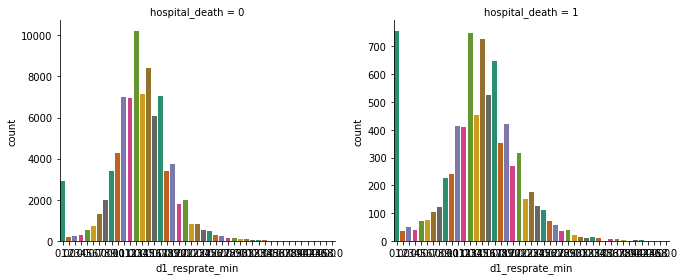

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


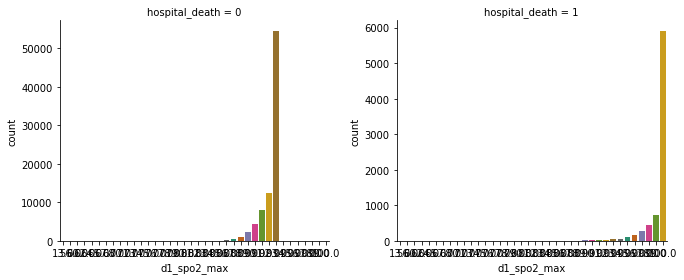

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


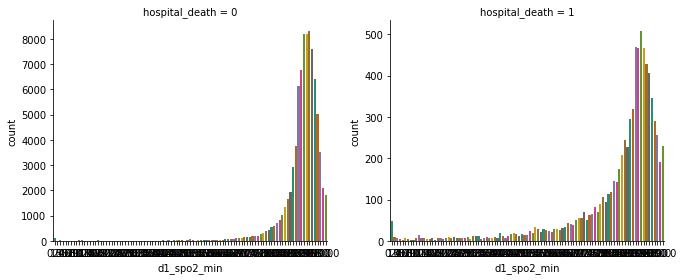

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


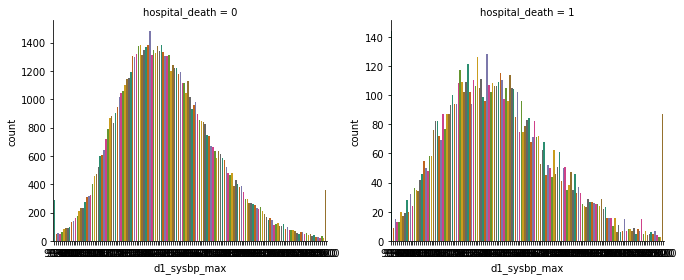

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


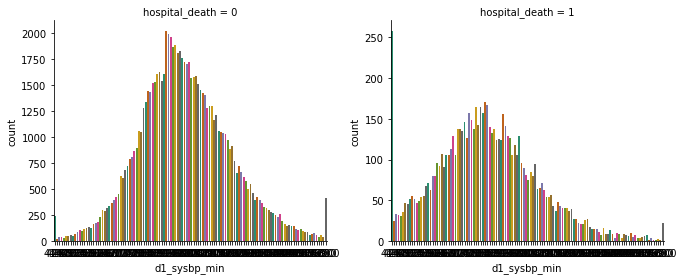

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


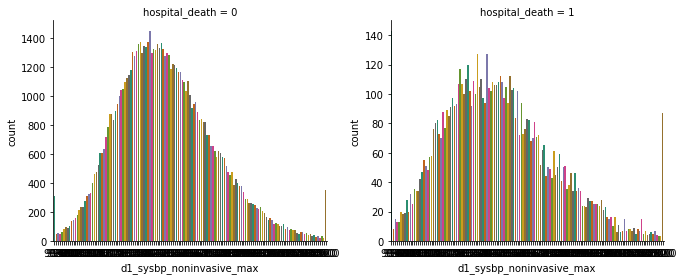

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


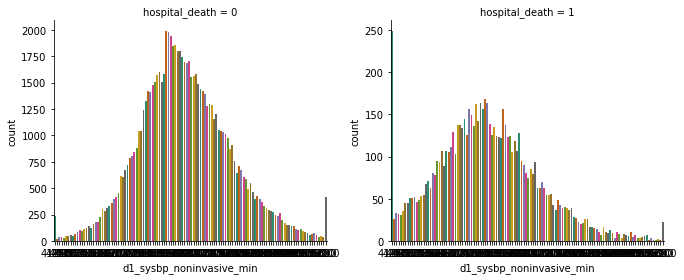

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


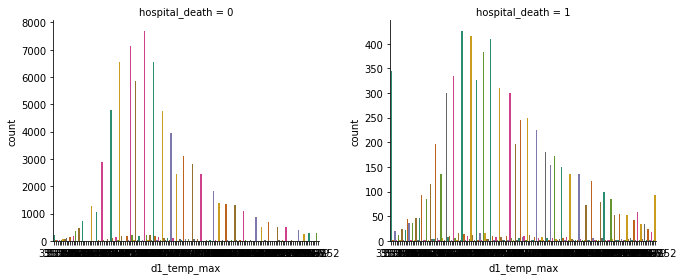

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


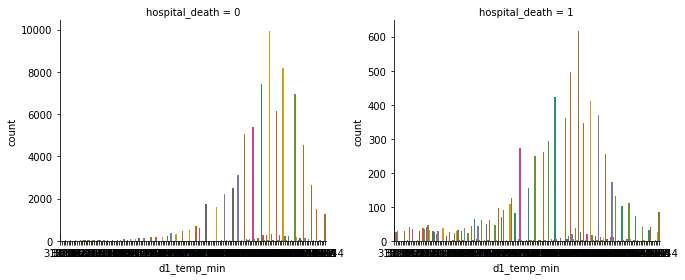

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


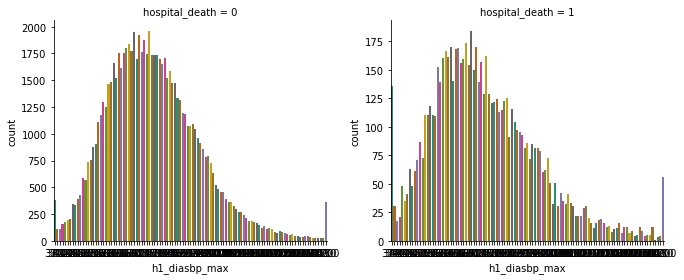

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


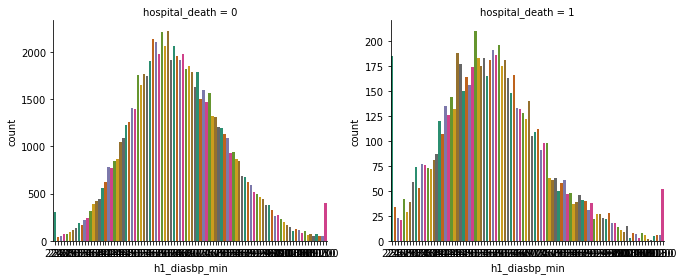

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


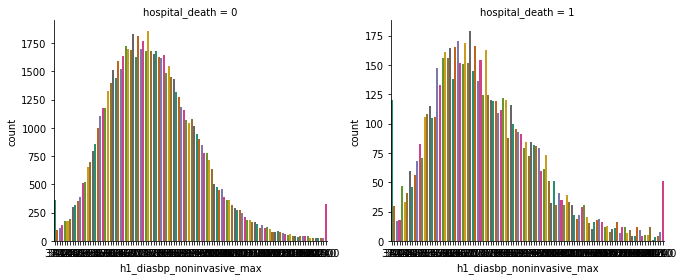

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


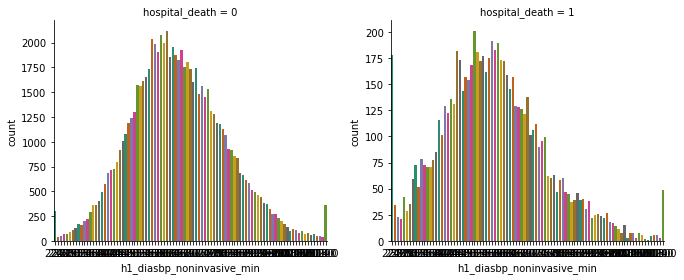

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


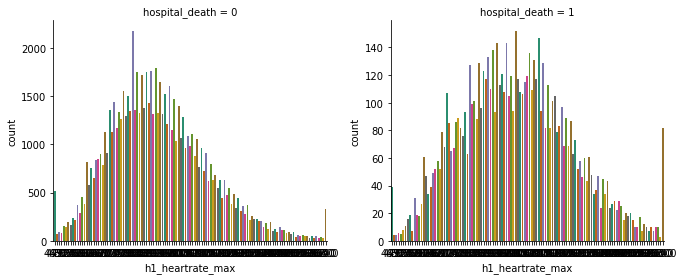

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


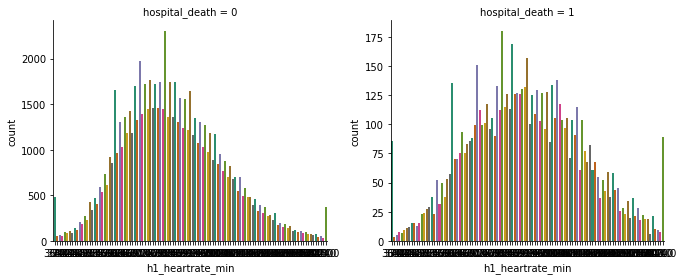

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


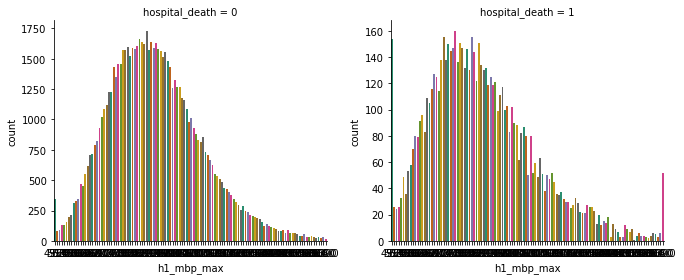

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


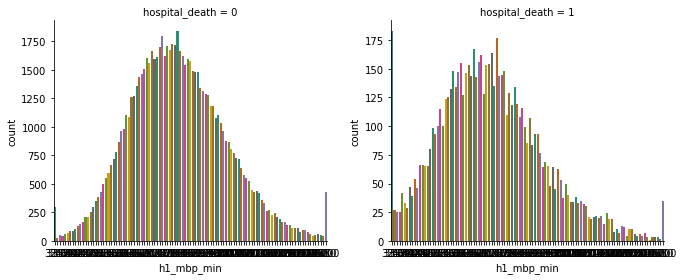

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


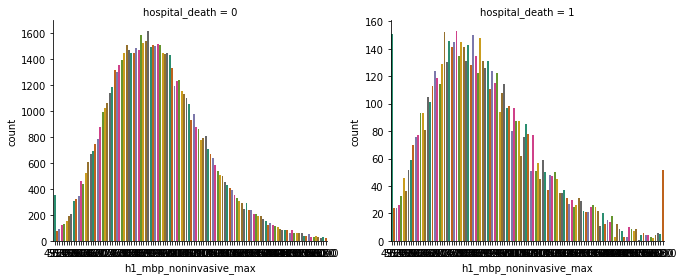

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


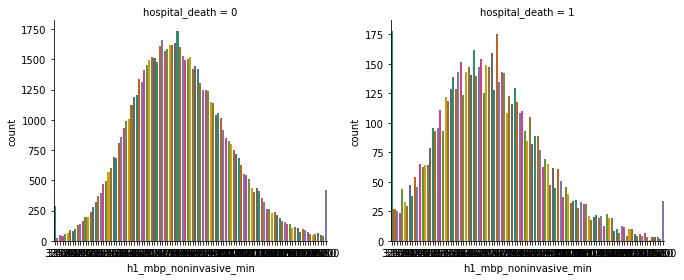

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


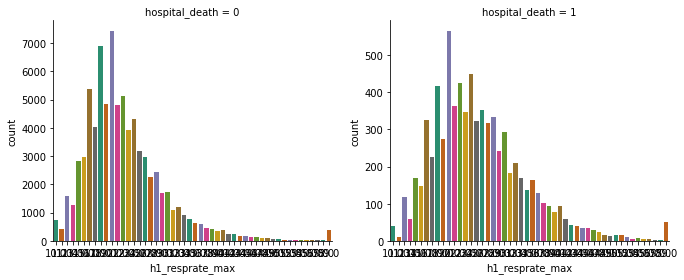

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


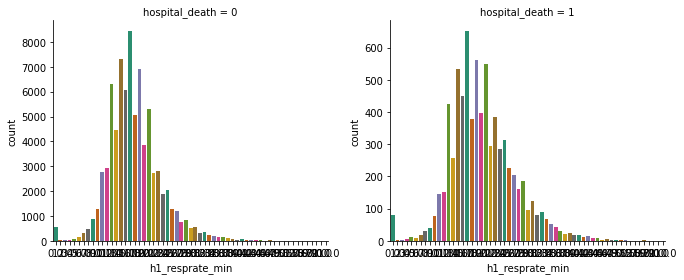

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


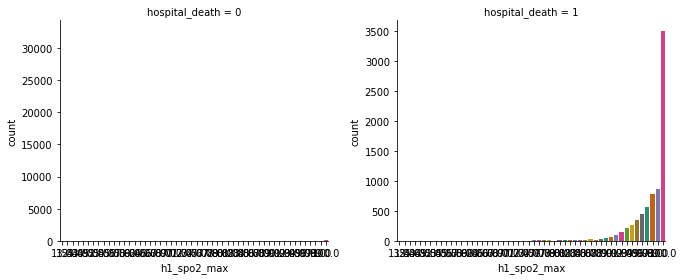

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


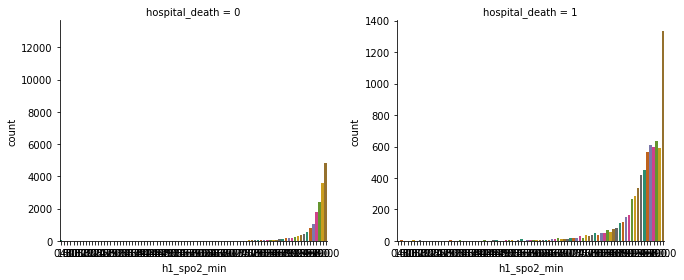

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


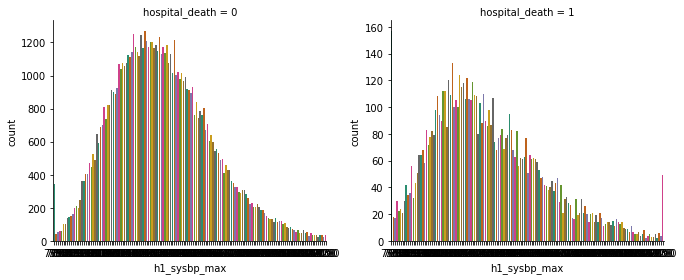

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


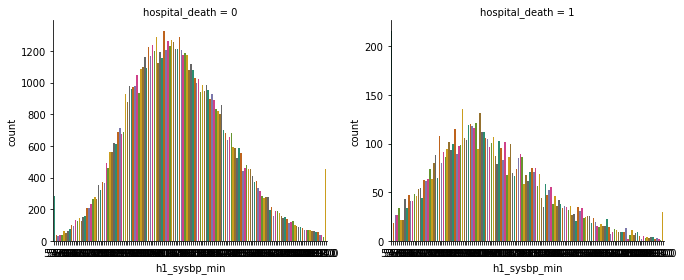

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


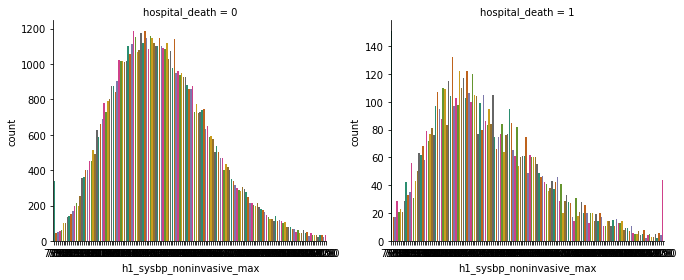

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


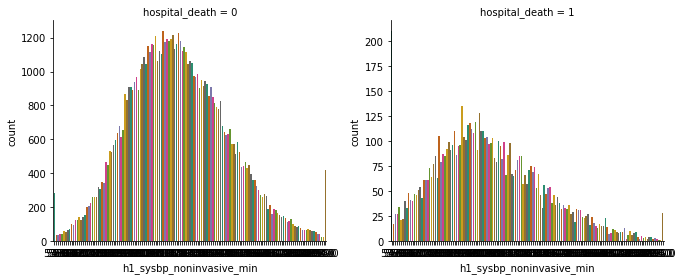

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


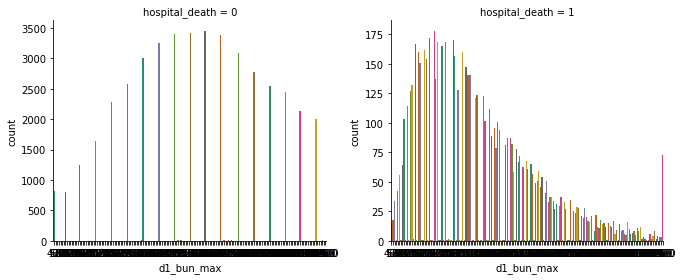

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


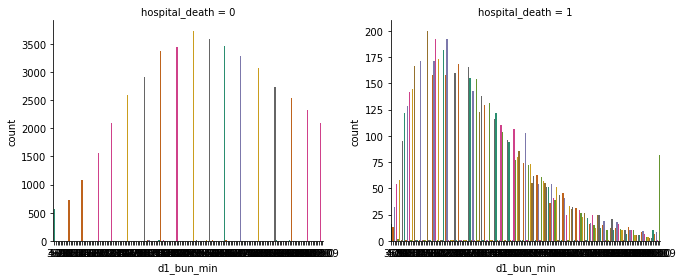

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


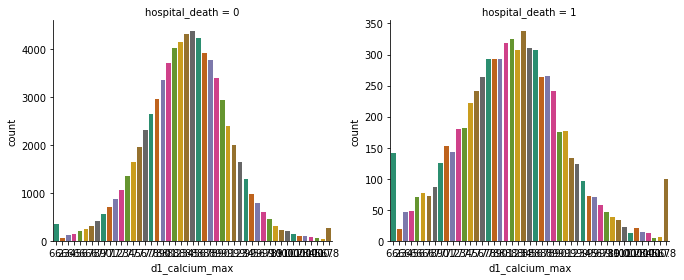

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


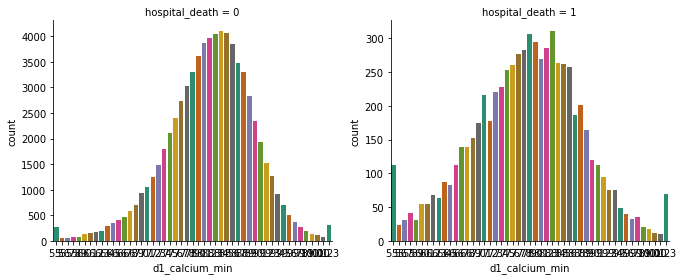

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


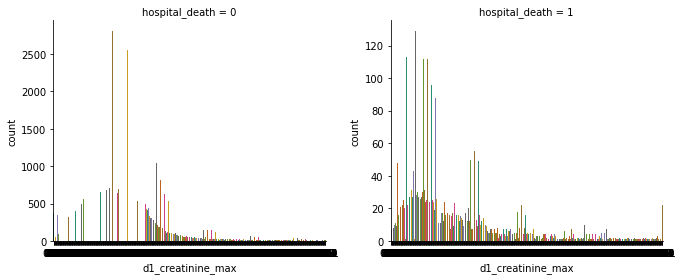

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


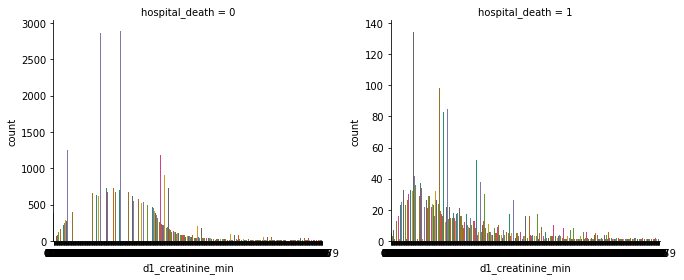

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


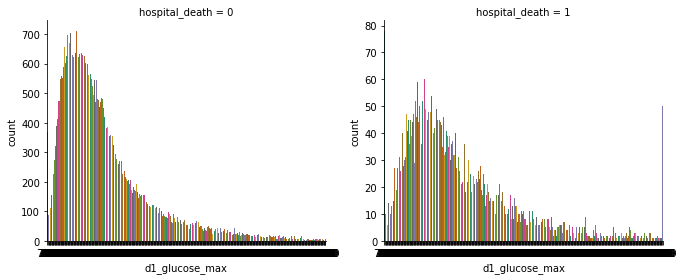

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


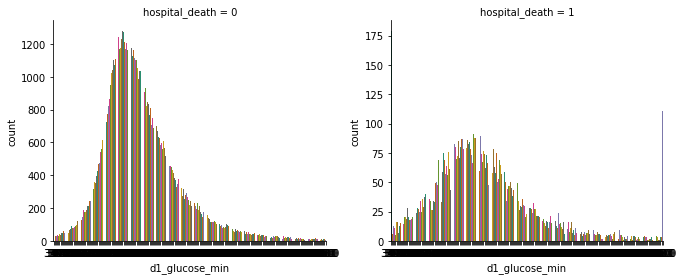

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


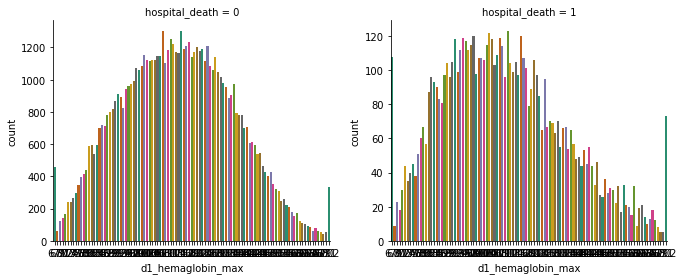

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


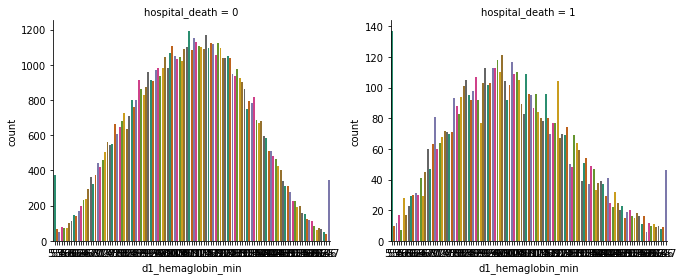

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


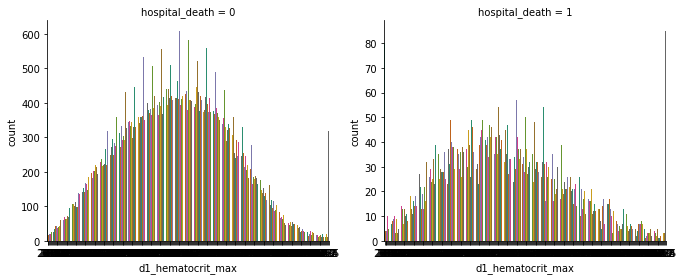

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


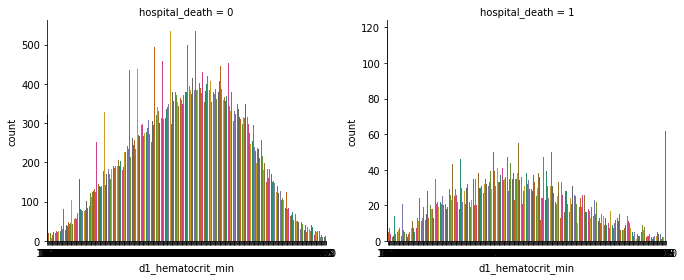

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


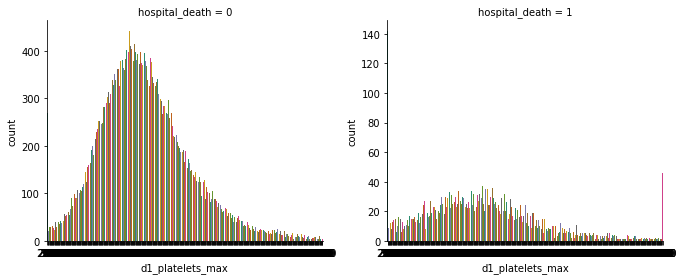

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


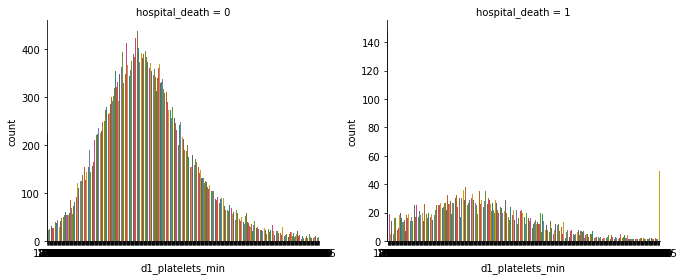

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


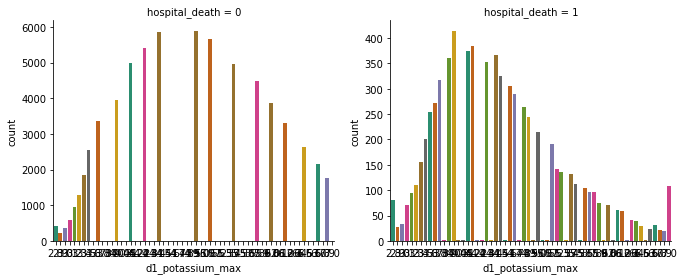

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


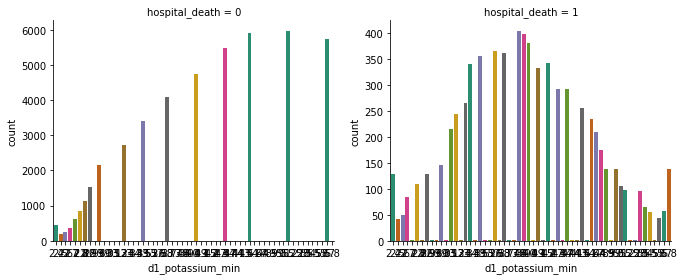

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


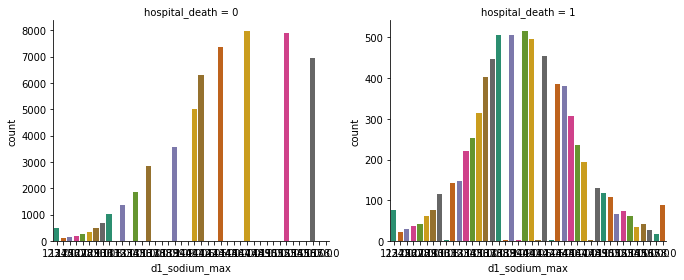

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


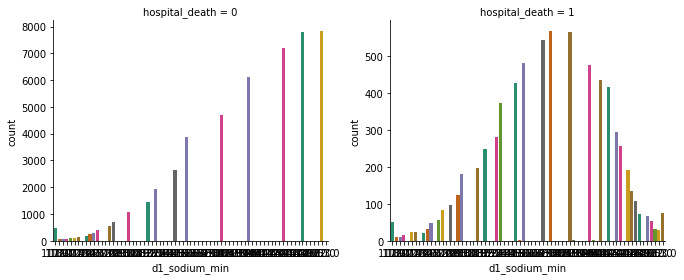

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


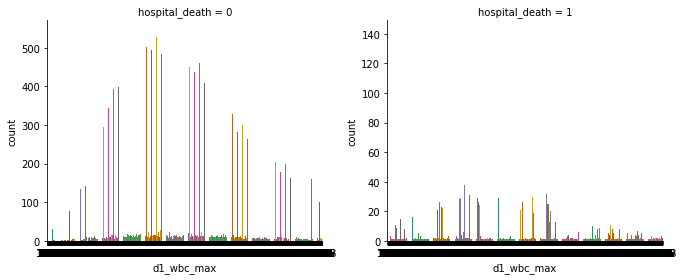

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


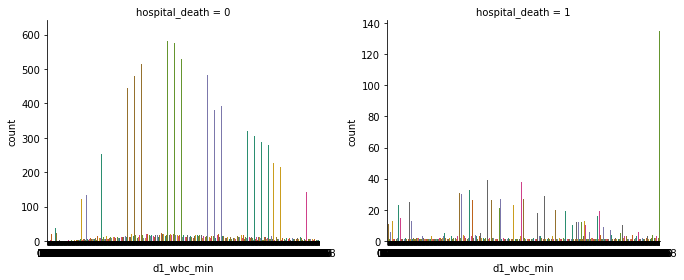

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


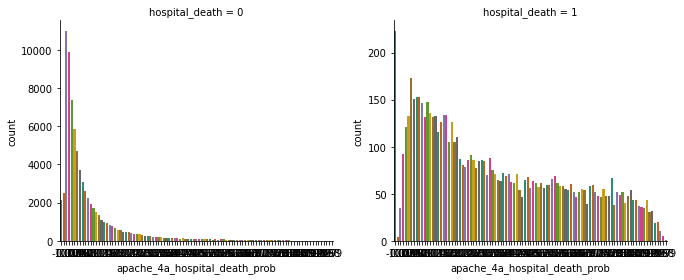

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


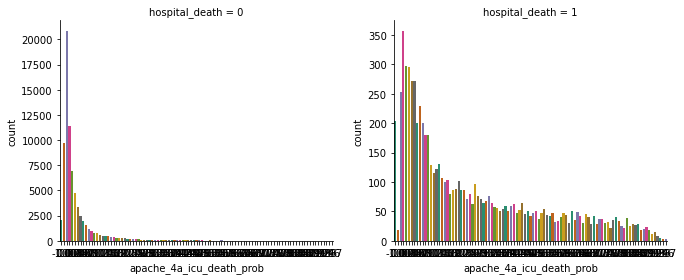

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


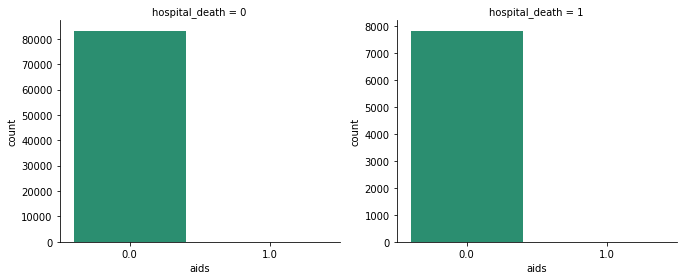

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


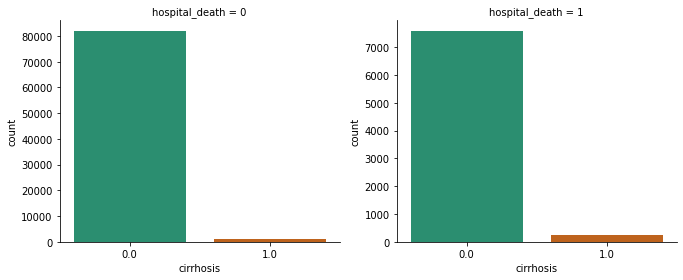

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


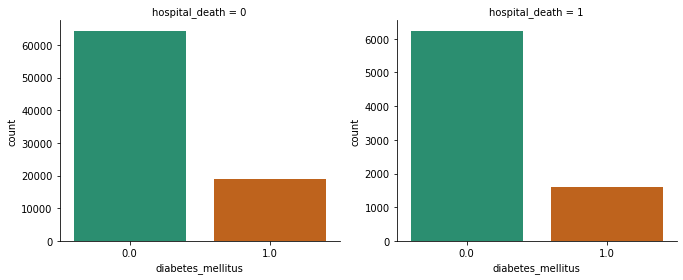

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


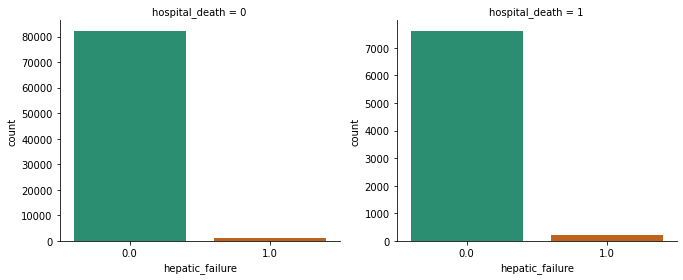

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


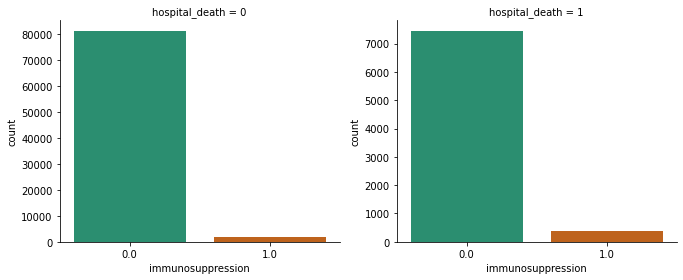

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


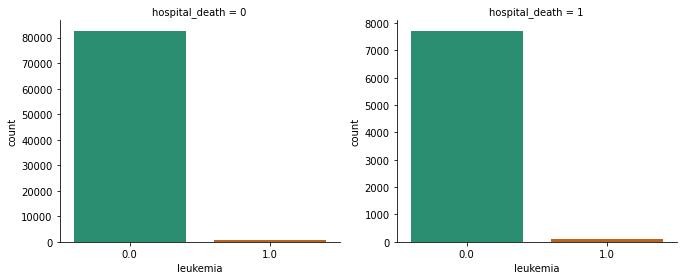

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


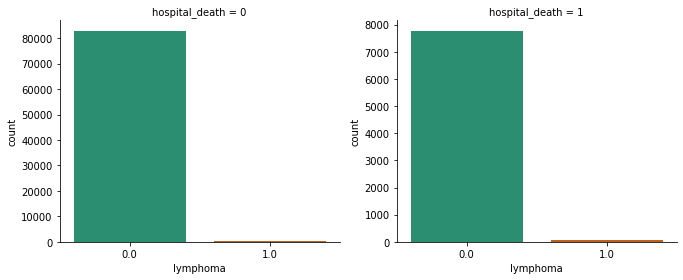

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


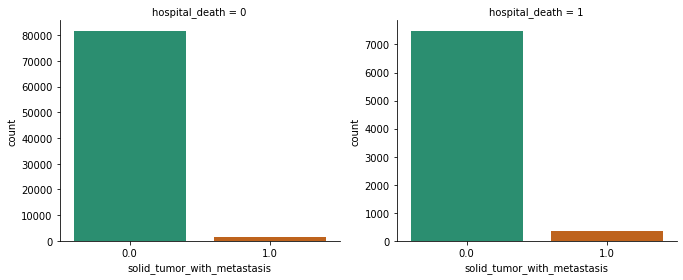

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


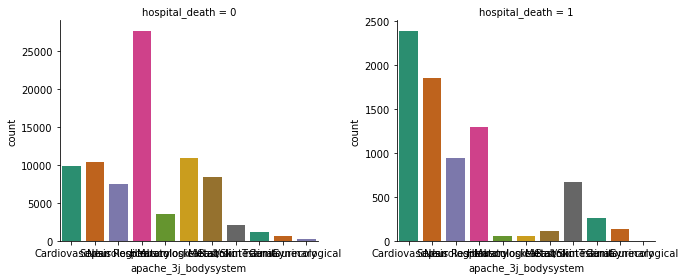

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


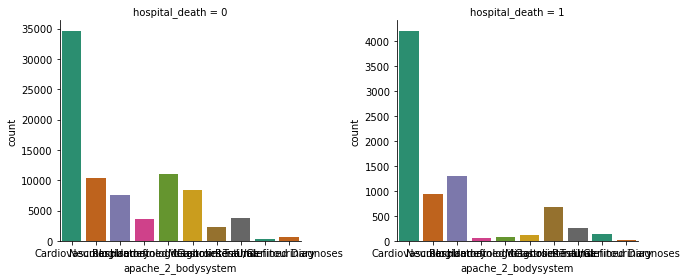

In [ ]:
for col in df_reduced.drop('hospital_death', axis=1):
    g = sns.FacetGrid(df_reduced, col='hospital_death', height=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

In [ ]:
df_reduced.describe()

hospital_death           age           bmi  elective_surgery  \
count    91713.000000  87485.000000  88284.000000      91713.000000   
mean         0.086302     62.309516     29.185818          0.183736   
std          0.280811     16.775119      8.275142          0.387271   
min          0.000000     16.000000     14.844926          0.000000   
25%          0.000000     52.000000     23.641975          0.000000   
50%          0.000000     65.000000     27.654655          0.000000   
75%          0.000000     75.000000     32.930206          0.000000   
max          1.000000     89.000000     67.814990          1.000000   

             height  pre_icu_los_days        weight  apache_2_diagnosis  \
count  90379.000000      91713.000000  88993.000000        90051.000000   
mean     169.641588          0.835766     84.028340          185.401739   
std       10.795378          2.487756     25.011497           86.050882   
min      137.200000        -24.947222     38.600000          101.000000   
25%      162.500000          0.035417     66.800000          113.000000   
50%      170.100000          0.138889     80.300000          122.000000   
75%      177.800000          0.409028     97.100000          301.000000   
max      195.590000        159.090972    186.000000          308.000000   

       apache_3j_diagnosis  apache_post_operative    arf_apache  \
count         90612.000000           91713.000000  90998.000000   
mean            558.216377               0.201106      0.027979   
std             463.266985               0.400829      0.164912   
min               0.010000               0.000000      0.000000   
25%             203.010000               0.000000      0.000000   
50%             409.020000               0.000000      0.000000   
75%             703.030000               0.000000      0.000000   
max            2201.050000               1.000000      1.000000   

       gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count     89812.000000      89812.000000       90676.000000   
mean          3.465049          5.471195           0.009528   
std           0.951715          1.288376           0.097148   
min           1.000000          1.000000           0.000000   
25%           3.000000          6.000000           0.000000   
50%           4.000000          6.000000           0.000000   
75%           4.000000          6.000000           0.000000   
max           4.000000          6.000000           1.000000   

       gcs_verbal_apache  glucose_apache  heart_rate_apache  intubated_apache  \
count       89812.000000    80677.000000       90835.000000      90998.000000   
mean            3.994778      160.326822          99.707932          0.151223   
std             1.560166       90.790551          30.870502          0.358268   
min             1.000000       39.000000          30.000000          0.000000   
25%             4.000000       97.000000          86.000000          0.000000   
50%             5.000000      133.000000         104.000000          0.000000   
75%             5.000000      196.000000         120.000000          0.000000   
max             5.000000      598.700000         178.000000          1.000000   

         map_apache  resprate_apache   temp_apache  ventilated_apache  \
count  90719.000000     90479.000000  87605.000000       90998.000000   
mean      88.015873        25.811007     36.414472           0.325721   
std       42.032412        15.106312      0.833496           0.468646   
min       40.000000         4.000000     32.100000           0.000000   
25%       54.000000        11.000000     36.200000           0.000000   
50%       67.000000        28.000000     36.500000           0.000000   
75%      125.000000        36.000000     36.700000           1.000000   
max      200.000000        60.000000     39.700000           1.000000   

       d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
count   91548.000000   91548.000000               90673.000000   

In [ ]:
df_reduced.corr()

hospital_death       age       bmi  \
hospital_death                     1.000000  0.111017 -0.031247   
age                                0.111017  1.000000 -0.087077   
bmi                               -0.031247 -0.087077  1.000000   
elective_surgery                  -0.093574  0.067320  0.015921   
height                            -0.019526 -0.109937 -0.056316   
...                                     ...       ...       ...   
hepatic_failure                    0.038864 -0.020061 -0.001855   
immunosuppression                  0.043973  0.025007 -0.031144   
leukemia                           0.029788  0.030310 -0.013375   
lymphoma                           0.018722  0.023335 -0.010017   
solid_tumor_with_metastasis        0.051105  0.025924 -0.043380   

                             elective_surgery    height  pre_icu_los_days  \
hospital_death                      -0.093574 -0.019526          0.063316   
age                                  0.067320 -0.109937          0.049872   
bmi                                  0.015921 -0.056316         -0.001531   
elective_surgery                     1.000000  0.023620          0.133704   
height                               0.023620  1.000000         -0.008075   
...                                       ...       ...               ...   
hepatic_failure                     -0.034700  0.010481          0.015063   
immunosuppression                   -0.014695  0.000530          0.032695   
leukemia                            -0.017587  0.001718          0.041853   
lymphoma                            -0.008215  0.008370          0.013954   
solid_tumor_with_metastasis          0.015369  0.004921          0.036581   

                               weight  apache_2_diagnosis  \
hospital_death              -0.038362           -0.089862   
age                         -0.127252            0.022914   
bmi                          0.877339            0.026047   
elective_surgery             0.026900            0.367040   
height                       0.391967            0.001630   
...                               ...                 ...   
hepatic_failure              0.002895           -0.003390   
immunosuppression           -0.029642           -0.014445   
leukemia                    -0.012755           -0.006915   
lymphoma                    -0.005197           -0.006705   
solid_tumor_with_metastasis -0.039255            0.007619   

                             apache_3j_diagnosis  apache_post_operative  \
hospital_death                         -0.090715              -0.083674   
age                                    -0.056060               0.059246   
bmi                                    -0.006514               0.015420   
elective_surgery                        0.775025               0.908247   
height                                  0.015268               0.025276   
...                                          ...                    ...   
hepatic_failure                        -0.025387              -0.033939   
immunosuppression                      -0.004731              -0.014487   
leukemia                               -0.006203              -0.013814   
lymphoma                               -0.003000              -0.008186   
solid_tumor_with_metastasis             0.018629               0.012375   

                             arf_apache  gcs_eyes_apache  gcs_motor_apache  \
hospital_death                 0.027309        -0.260373         -0.282449   
age                           -0.001684         0.026363          0.025843   
bmi                           -0.005823         0.012927          0.021091   
elective_surgery              -0.027357         0.009830          0.015783   
height                        -0.010473        -0.008601         -0.013907   
...                                 ...              ...               ...   
hepatic_failure                0.013494        -0.013279         -0.005705   
immunosuppression              0.002247  

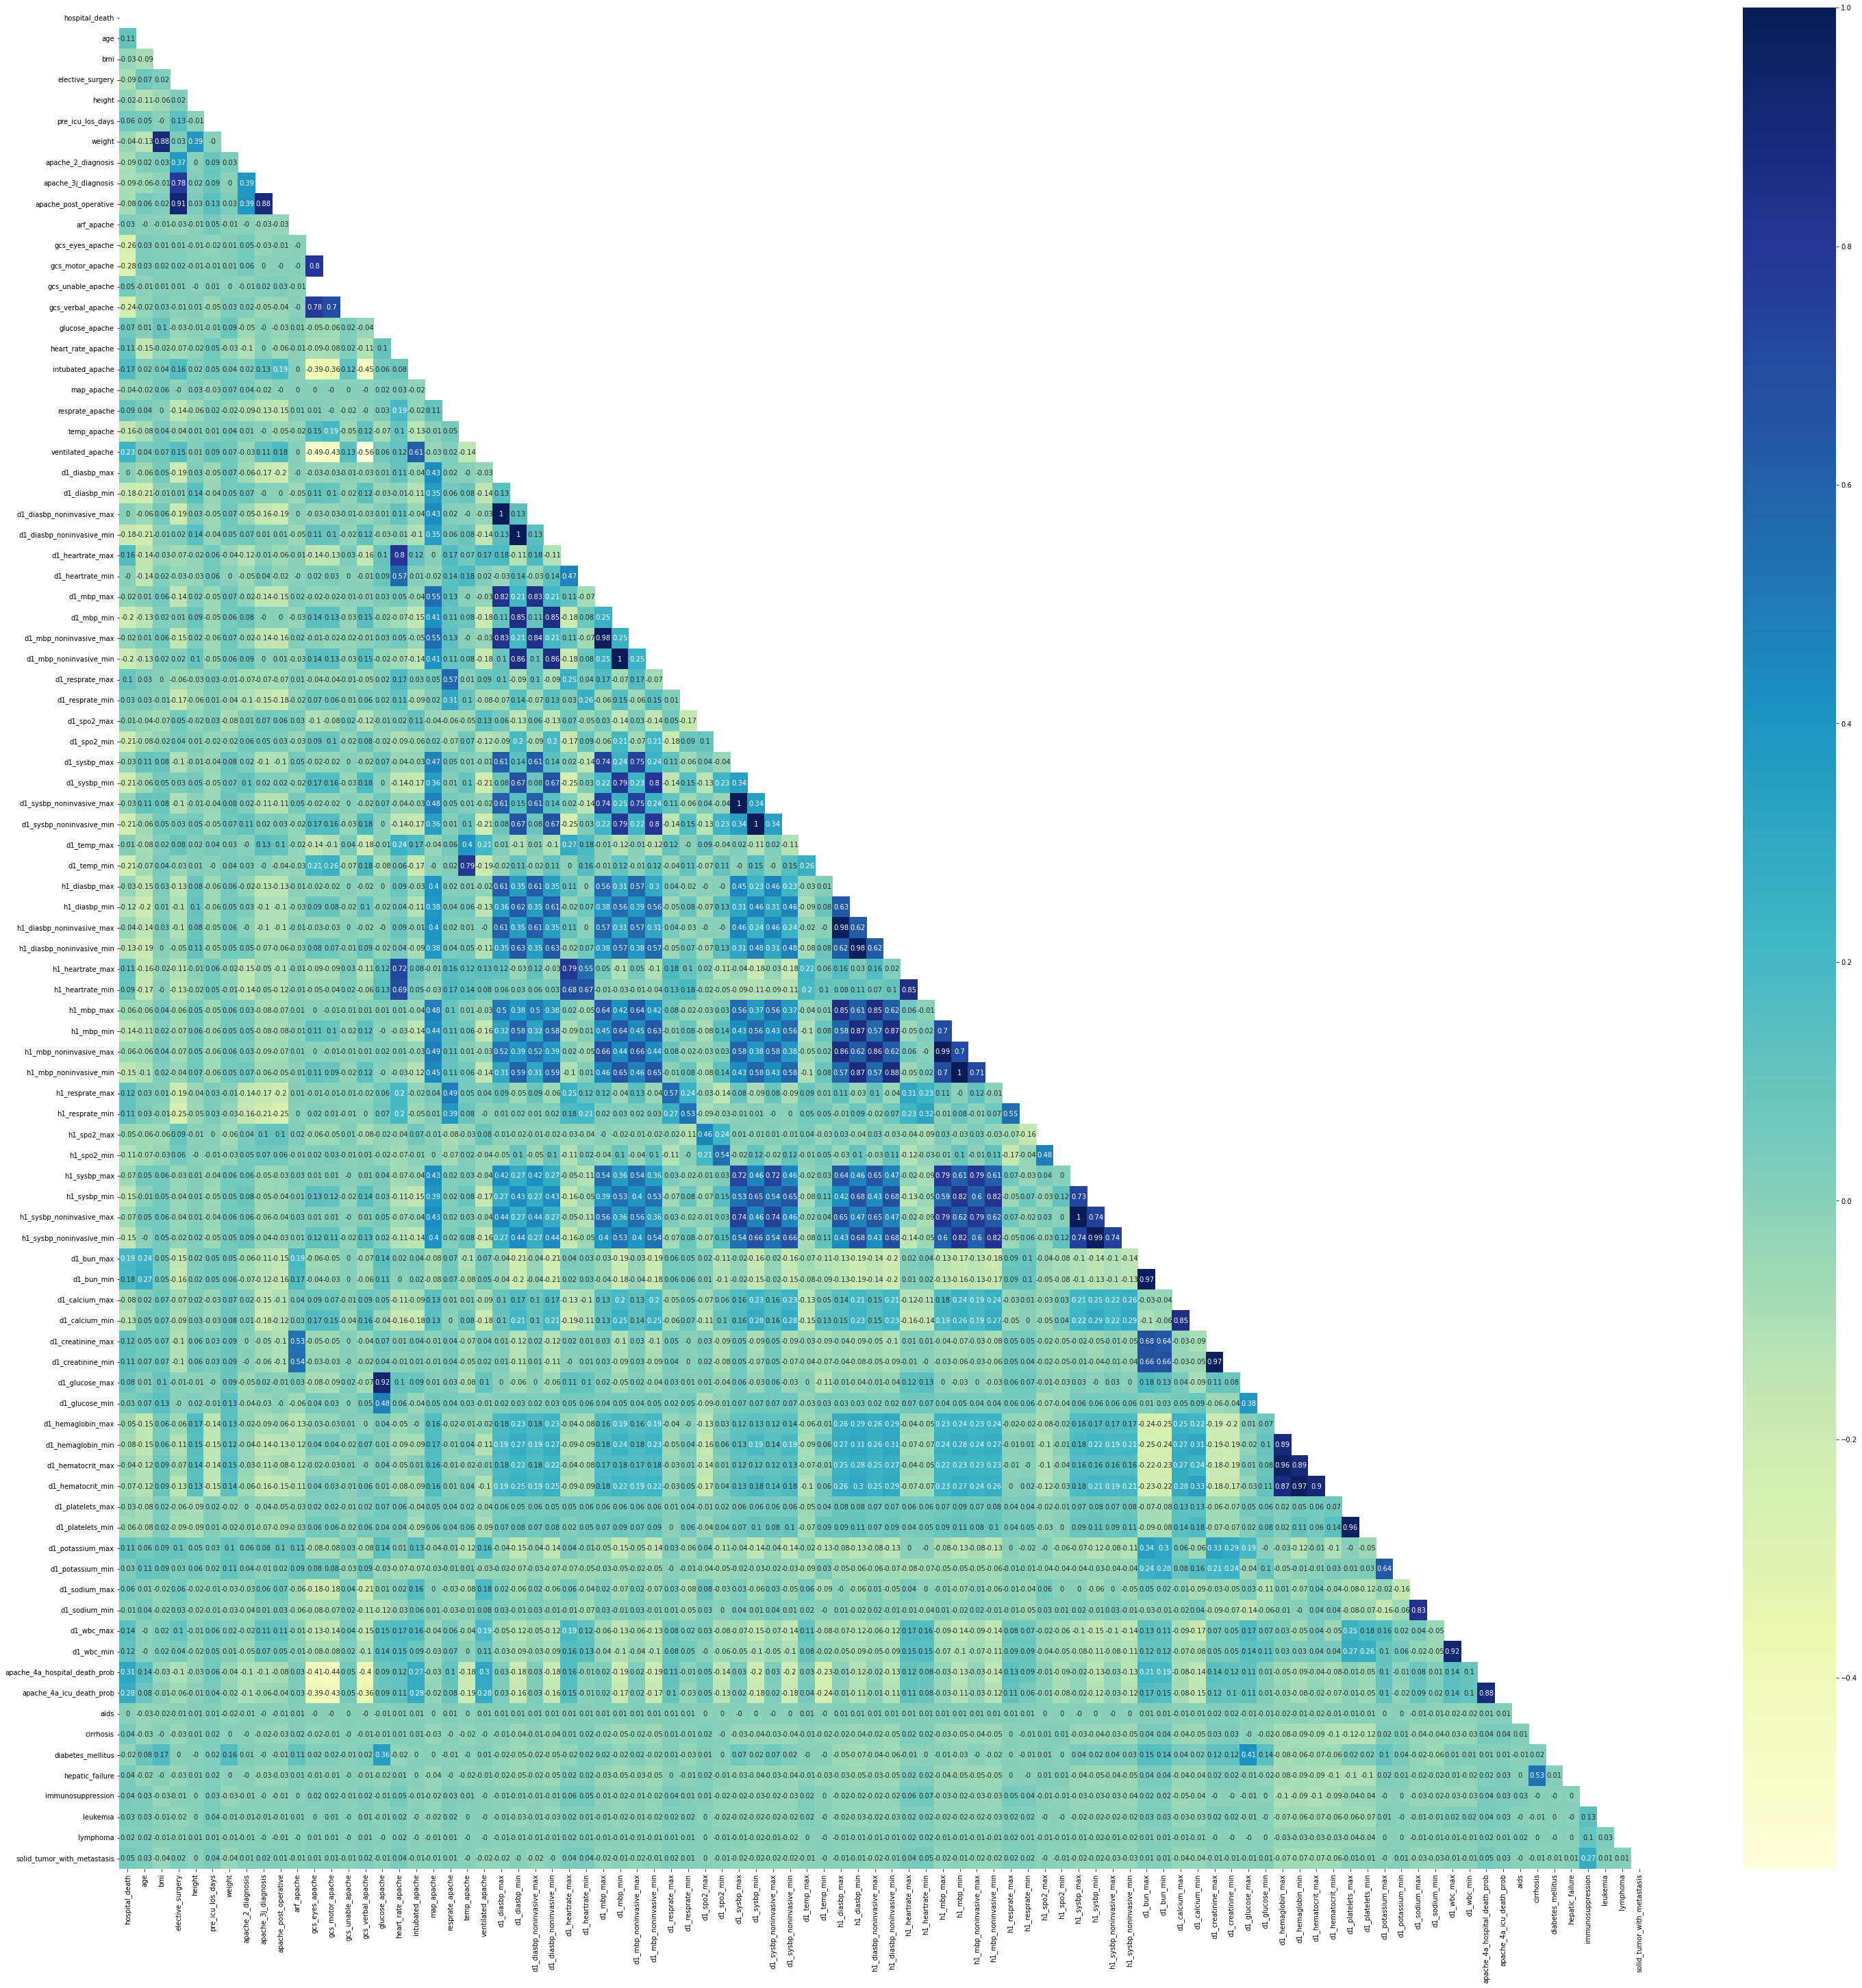

In [ ]:
plt.figure(figsize = (50, 50))
mask = np.triu(np.ones_like(df_reduced.corr(), dtype=bool))
sns.heatmap(df_reduced.corr().round(2),annot=True, cmap="YlGnBu",mask=mask)

## Filling missing values and encoding categorical values

In [ ]:
for col in df_reduced[cat_col]:
  print(f"{col} ---> {df_reduced[col].unique()},{df_reduced[col].mode()}")

ethnicity ---> ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown'],0    Caucasian
dtype: object
gender ---> ['M' 'F' nan],0    M
dtype: object
icu_admit_source ---> ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan],0    Accident & Emergency
dtype: object
icu_stay_type ---> ['admit' 'readmit' 'transfer'],0    admit
dtype: object
icu_type ---> ['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU'],0    Med-Surg ICU
dtype: object
apache_3j_bodysystem ---> ['Sepsis' 'Respiratory' 'Metabolic' 'Cardiovascular' 'Trauma'
 'Neurological' 'Gastrointestinal' 'Genitourinary' nan 'Hematological'
 'Musculoskeletal/Skin' 'Gynecological'],0    Cardiovascular
dtype: object
apache_2_bodysystem ---> ['Cardiovascular' 'Respiratory' 'Metabolic' 'Trauma' 'Neurologic'
 'Gastrointestinal' 'Renal/Genitourinary' nan 'Undefined diagnoses'
 'Haematologic' 'Undefined Diagnoses'],0    Cardiovascular
dt

## fill missing values

In [41]:
def fillCatCol(df,cat_col):
  for col in df[cat_col]:
    df[col].fillna(value = df[col].mode()[0],inplace=True)
  return df

In [39]:
df_reduced = fillCatCol(df_reduced,cat_col)

In [ ]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 97 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_death                 91713 non-null  int64  
 1   age                            87485 non-null  float64
 2   bmi                            88284 non-null  float64
 3   elective_surgery               91713 non-null  int64  
 4   ethnicity                      91713 non-null  object 
 5   gender                         91713 non-null  object 
 6   height                         90379 non-null  float64
 7   icu_admit_source               91713 non-null  object 
 8   icu_stay_type                  91713 non-null  object 
 9   icu_type                       91713 non-null  object 
 10  pre_icu_los_days               91713 non-null  float64
 11  weight                         88993 non-null  float64
 12  apache_2_diagnosis             90051 non-null 

## Ordinal Encoding

In [ ]:
df_cat_filled = df_reduced.copy()

In [ ]:
def ordinal_encoder(df, feats): 
  for feat in feats:    
    feat_val = list(1+np.arange(df[feat].nunique()))
    feat_key = list(df[feat].sort_values().unique())
    print(f"{feat}-->{feat_key}")
    feat_dict = dict(zip(feat_key, feat_val))
    df[feat] = df[feat].map(feat_dict)
  return df

df_ordinal_encoded = ordinal_encoder(df_reduced, df_reduced[cat_col].columns)
df_ordinal_encoded

## Filling missing values of numeric columns

In [ ]:
df_ordinal_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 97 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_death                 91713 non-null  int64  
 1   age                            87485 non-null  float64
 2   bmi                            88284 non-null  float64
 3   elective_surgery               91713 non-null  int64  
 4   ethnicity                      91713 non-null  int64  
 5   gender                         91713 non-null  int64  
 6   height                         90379 non-null  float64
 7   icu_admit_source               91713 non-null  int64  
 8   icu_stay_type                  91713 non-null  int64  
 9   icu_type                       91713 non-null  int64  
 10  pre_icu_los_days               91713 non-null  float64
 11  weight                         88993 non-null  float64
 12  apache_2_diagnosis             90051 non-null 

In [ ]:
df_ordinal_encoded = df_ordinal_encoded.astype('float')

In [ ]:
df_ordinal_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 97 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_death                 91713 non-null  float64
 1   age                            87485 non-null  float64
 2   bmi                            88284 non-null  float64
 3   elective_surgery               91713 non-null  float64
 4   ethnicity                      91713 non-null  float64
 5   gender                         91713 non-null  float64
 6   height                         90379 non-null  float64
 7   icu_admit_source               91713 non-null  float64
 8   icu_stay_type                  91713 non-null  float64
 9   icu_type                       91713 non-null  float64
 10  pre_icu_los_days               91713 non-null  float64
 11  weight                         88993 non-null  float64
 12  apache_2_diagnosis             90051 non-null 

In [ ]:
num_col = df_reduced.select_dtypes(include = 'float64').columns

In [ ]:
num_col

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninva

In [ ]:
def fillnumColwithMean(df,num_col):
  for col in df[num_col]:
    df[col].fillna(value = df[col].mean(),inplace=True)
  return df

In [ ]:
df_num_col_filled = fillnumColwithMean(df_ordinal_encoded,num_col)
df_num_col_filled

In [ ]:
df_num_col_filled.isnull().sum()

hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
                              ..
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
Length: 97, dtype: int64

## Check for multicollinearity

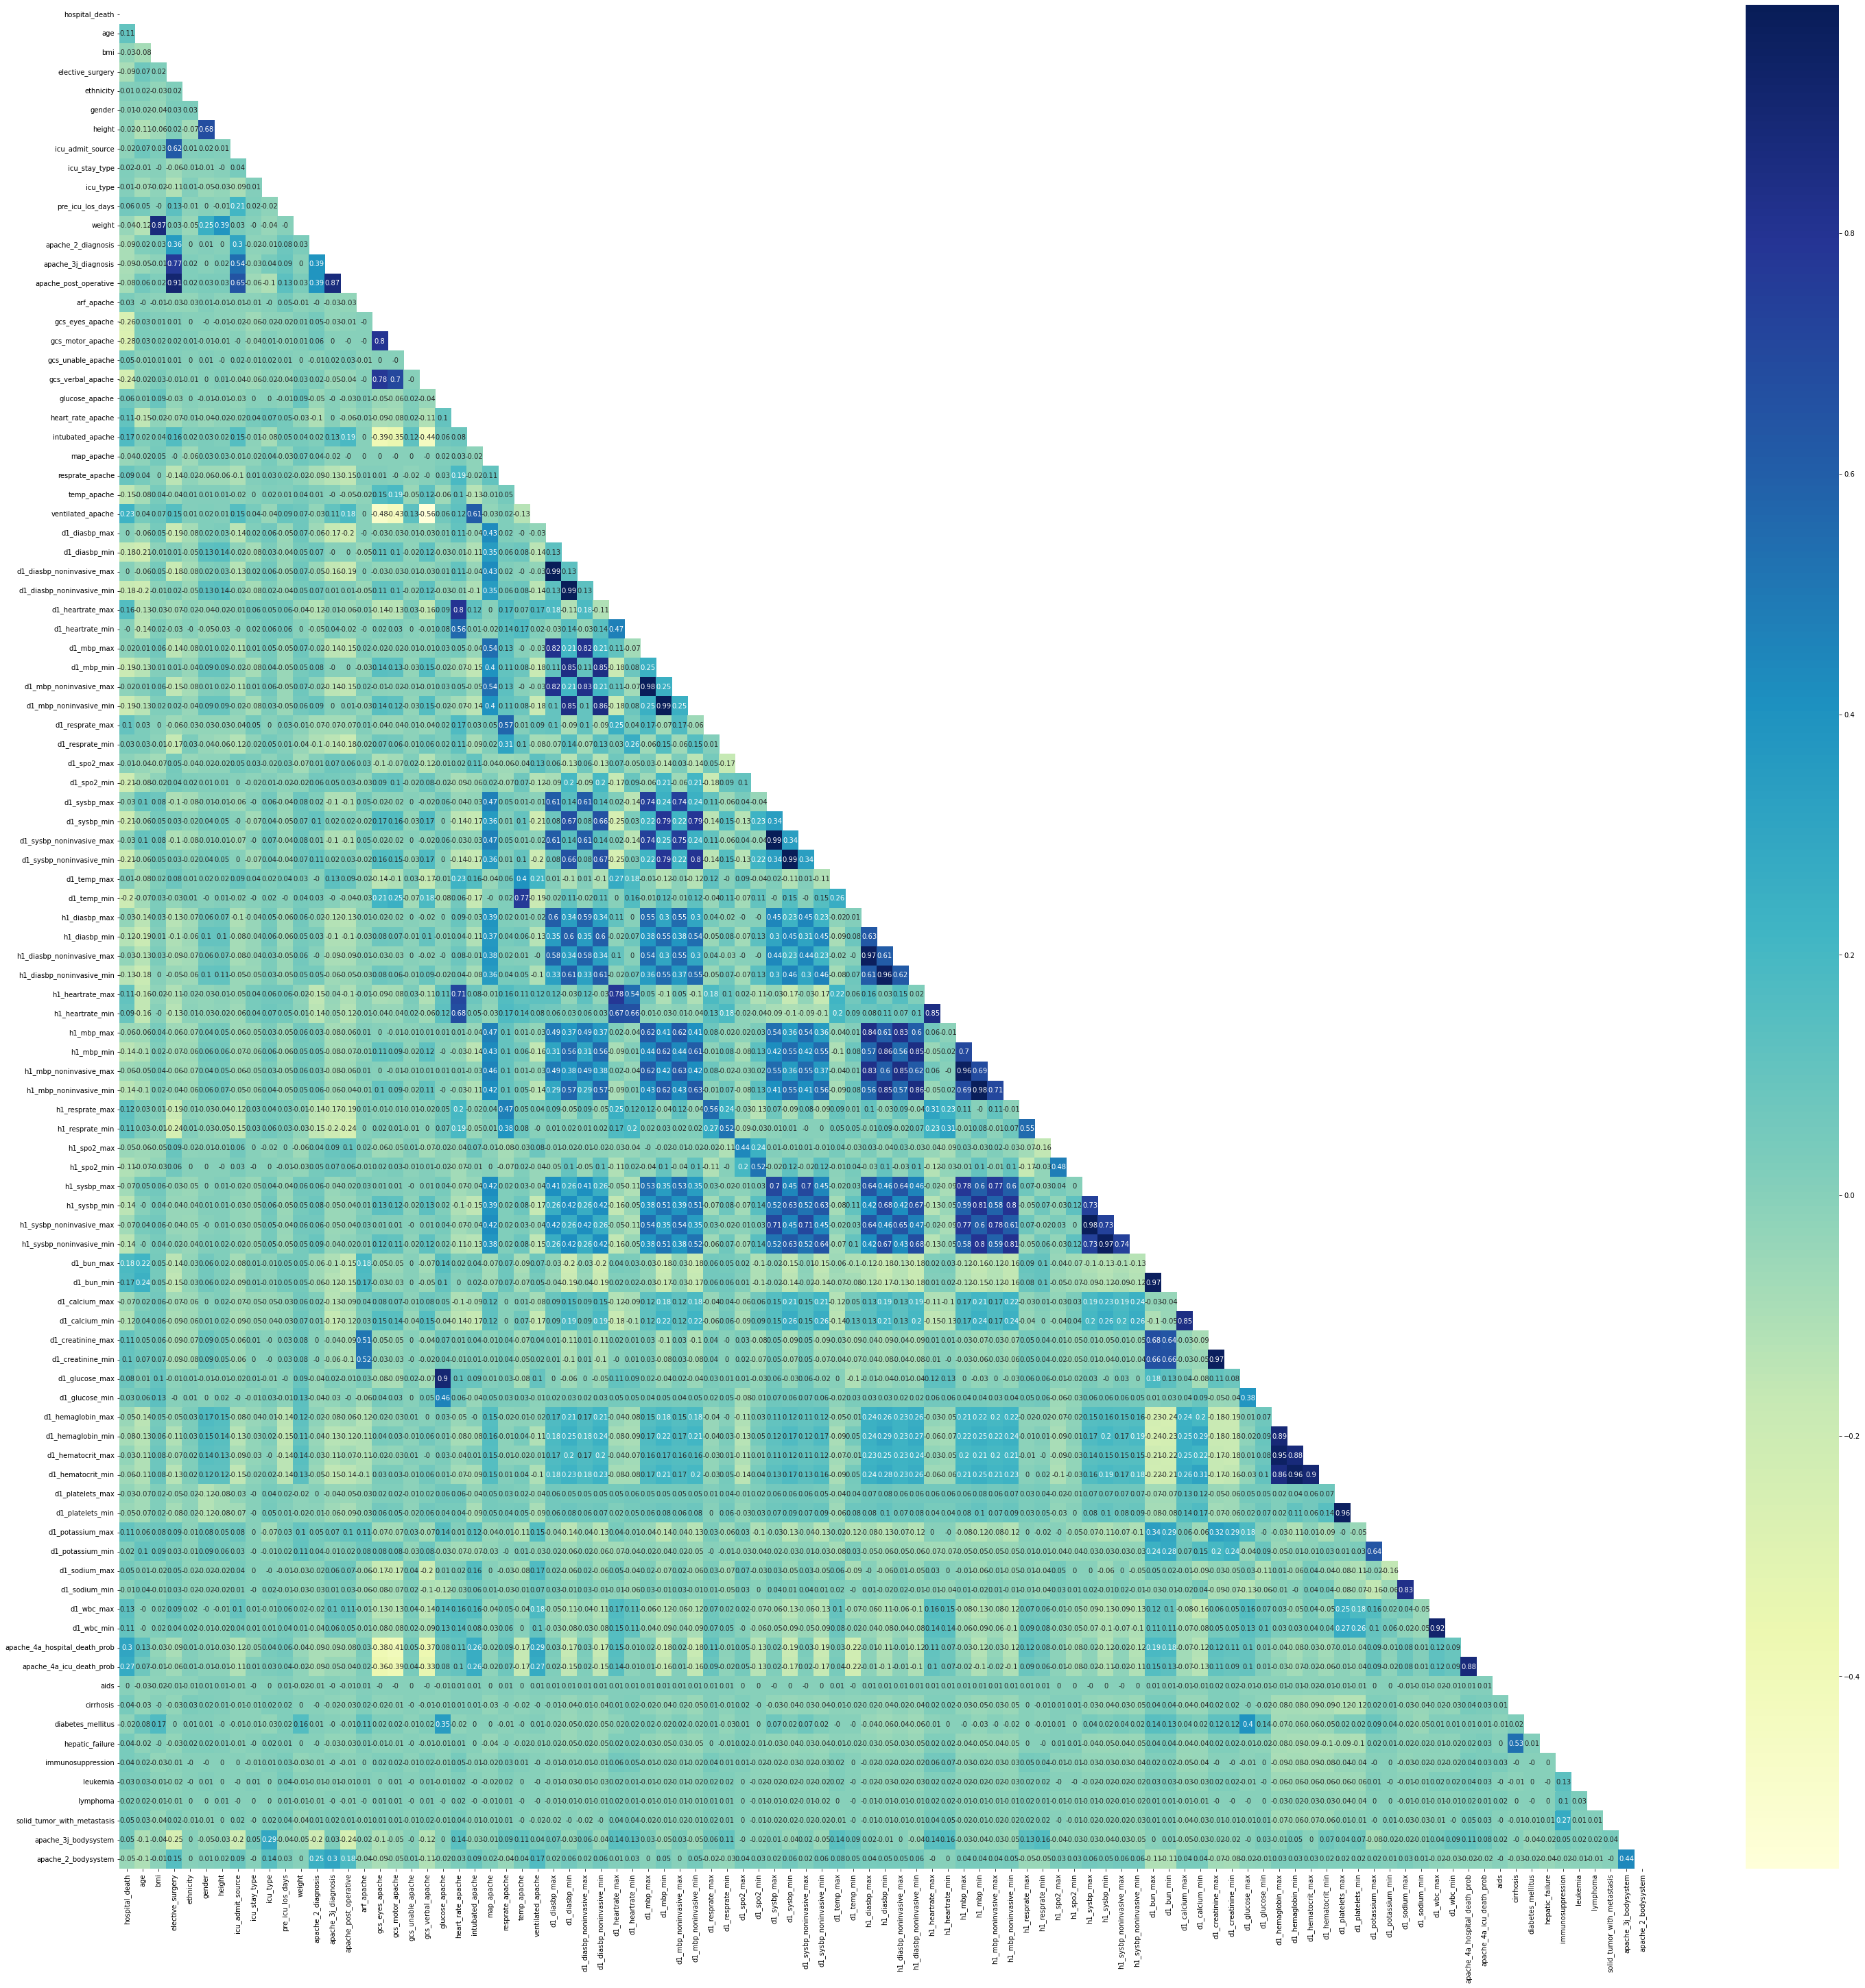

In [ ]:
plt.figure(figsize = (50, 50))
mask = np.triu(np.ones_like(df_num_col_filled.corr(), dtype=bool))
sns.heatmap(df_num_col_filled.corr().round(2),annot=True, cmap="YlGnBu",mask=mask)

In [ ]:
df_num_col_filled.to_csv("patient_cleaned.csv",index=False)

In [10]:
df_num_col_filled = pd.read_csv('patient_cleaned.csv')

In [11]:
X = df_num_col_filled.drop(columns=['hospital_death'])
Y = df_num_col_filled['hospital_death']

## Calculate VIF to drop the most collinear columns

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
vif_data

feature         VIF
0                           age   21.529719
1                           bmi  230.123373
2              elective_surgery    7.250263
3                     ethnicity   10.964230
4                        gender   20.386802
..                          ...         ...
91                     leukemia    1.041022
92                     lymphoma    1.019533
93  solid_tumor_with_metastasis    1.118050
94         apache_3j_bodysystem    6.400371
95          apache_2_bodysystem    4.323987

[96 rows x 2 columns]

In [ ]:
def removeCollinearFeatures_VIF(vif_data,thresh = 10):

  mask = vif_data['VIF'] < 10
  df_reduced_vif = vif_data[mask]
  return df_reduced_vif

#Experiment 1: 

## Considering the columns only with VIF less than 10

In [ ]:
df_reduced_vif_10 = removeCollinearFeatures_VIF(vif_data,thresh = 10)
df_reduced_vif_10

feature       VIF
2                elective_surgery  7.250263
6                icu_admit_source  8.063534
7                   icu_stay_type  7.360693
9                pre_icu_los_days  1.221923
11             apache_2_diagnosis  8.296214
14                     arf_apache  1.583192
17              gcs_unable_apache  1.053008
21               intubated_apache  2.056763
22                     map_apache  9.075208
23                resprate_apache  7.529509
25              ventilated_apache  3.263607
84  apache_4a_hospital_death_prob  5.614505
85       apache_4a_icu_death_prob  4.843525
86                           aids  1.006582
87                      cirrhosis  1.426902
88              diabetes_mellitus  1.664371
89                hepatic_failure  1.414085
90              immunosuppression  1.159488
91                       leukemia  1.041022
92                       lymphoma  1.019533
93    solid_tumor_with_metastasis  1.118050
94           apache_3j_bodysystem  6.400371
95            apache_2_bodysystem  4.323987

In [ ]:
df_reduced_vif_10['feature'].values

array(['elective_surgery', 'icu_admit_source', 'icu_stay_type',
       'pre_icu_los_days', 'apache_2_diagnosis', 'arf_apache',
       'gcs_unable_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'ventilated_apache',
       'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'], dtype=object)

In [ ]:
X =  X[df_reduced_vif_10['feature'].values]

X

elective_surgery  icu_admit_source  icu_stay_type  pre_icu_los_days  \
0                   0.0               2.0            1.0          0.541667   
1                   0.0               2.0            1.0          0.927778   
2                   0.0               1.0            1.0          0.000694   
3                   1.0               3.0            1.0          0.000694   
4                   0.0               1.0            1.0          0.073611   
...                 ...               ...            ...               ...   
91708               0.0               2.0            1.0          0.298611   
91709               0.0               2.0            1.0          0.120139   
91710               0.0               1.0            1.0          0.046528   
91711               0.0               1.0            1.0          0.081944   
91712               1.0               3.0            1.0          0.018056   

       apache_2_diagnosis  arf_apache  gcs_unable_apache  intubated_apache  \
0                   113.0         0.0           0.000000               0.0   
1                   108.0         0.0           0.000000               0.0   
2                   122.0         0.0           0.000000               0.0   
3                   203.0         0.0           0.000000               1.0   
4                   119.0         0.0           0.009528               0.0   
...                   ...         ...                ...               ...   
91708               113.0         0.0           0.000000               0.0   
91709               113.0         0.0           0.000000               0.0   
91710               123.0         0.0           0.000000               0.0   
91711               108.0         0.0           0.000000               0.0   
91712               304.0         0.0           0.000000               0.0   

       map_apache  resprate_apache  ventilated_apache  \
0            40.0             36.0                0.0   
1            46.0             33.0                1.0   
2            68.0             37.0                0.0   
3            60.0              4.0                1.0   
4           103.0             16.0                0.0   
...           ...              ...                ...   
91708        48.0              9.0                1.0   
91709        62.0             33.0                0.0   
91710        57.0              4.0                0.0   
91711        54.0             14.0                0.0   
91712        56.0              4.0                1.0   

       apache_4a_hospital_death_prob  apache_4a_icu_death_prob  aids  \
0                           0.100000                  0.050000   0.0   
1                           0.470000                  0.290000   0.0   
2                           0.000000                  0.000000   0.0   
3                           0.040000                  0.030000   0.0   
4                           0.086787                  0.043955   0.0   
...                              ...                       ...   ...   
91708                       0.120000                  0.050000   0.0   
91709                       0.030000                  0.020000   0.0   
91710                       0.050000                  0.020000   0.0   
91711                       0.070000                  0.020000   0.0   
91712                       0.190000                  0.080000   0.0   

       cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
0            0.0                1.0              0.0                0.0   
1            0.0                1.0              0.0                0.0   
2            0.0                0.0              0.0                0.0   
3            0.0                0.0              0.0                0.0   
4            0.0                0.0              0.0                0.0   
...          ...                ...              ...                ...   
91708        0.0                1.0              0.0      

In [ ]:

X.columns = df_reduced_vif_10['feature']
X

feature  elective_surgery  icu_admit_source  icu_stay_type  pre_icu_los_days  \
0                     0.0               2.0            1.0          0.541667   
1                     0.0               2.0            1.0          0.927778   
2                     0.0               1.0            1.0          0.000694   
3                     1.0               3.0            1.0          0.000694   
4                     0.0               1.0            1.0          0.073611   
...                   ...               ...            ...               ...   
91708                 0.0               2.0            1.0          0.298611   
91709                 0.0               2.0            1.0          0.120139   
91710                 0.0               1.0            1.0          0.046528   
91711                 0.0               1.0            1.0          0.081944   
91712                 1.0               3.0            1.0          0.018056   

feature  apache_2_diagnosis  arf_apache  gcs_unable_apache  intubated_apache  \
0                     113.0         0.0           0.000000               0.0   
1                     108.0         0.0           0.000000               0.0   
2                     122.0         0.0           0.000000               0.0   
3                     203.0         0.0           0.000000               1.0   
4                     119.0         0.0           0.009528               0.0   
...                     ...         ...                ...               ...   
91708                 113.0         0.0           0.000000               0.0   
91709                 113.0         0.0           0.000000               0.0   
91710                 123.0         0.0           0.000000               0.0   
91711                 108.0         0.0           0.000000               0.0   
91712                 304.0         0.0           0.000000               0.0   

feature  map_apache  resprate_apache  ventilated_apache  \
0              40.0             36.0                0.0   
1              46.0             33.0                1.0   
2              68.0             37.0                0.0   
3              60.0              4.0                1.0   
4             103.0             16.0                0.0   
...             ...              ...                ...   
91708          48.0              9.0                1.0   
91709          62.0             33.0                0.0   
91710          57.0              4.0                0.0   
91711          54.0             14.0                0.0   
91712          56.0              4.0                1.0   

feature  apache_4a_hospital_death_prob  apache_4a_icu_death_prob  aids  \
0                             0.100000                  0.050000   0.0   
1                             0.470000                  0.290000   0.0   
2                             0.000000                  0.000000   0.0   
3                             0.040000                  0.030000   0.0   
4                             0.086787                  0.043955   0.0   
...                                ...                       ...   ...   
91708                         0.120000                  0.050000   0.0   
91709                         0.030000                  0.020000   0.0   
91710                         0.050000                  0.020000   0.0   
91711                         0.070000                  0.020000   0.0   
91712                         0.190000                  0.080000   0.0   

feature  cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
0              0.0                1.0              0.0                0.0   
1              0.0                1.0              0.0                0.0   
2              0.0                0.0              0.0                0.0   
3              0.0                0.0              0.0                0.0   
4              0.0                0.0              0.0                0.0   
...            ...

In [ ]:
X.to_csv("pat_Vif_reduced_10.csv",index=False)

In [12]:
X = pd.read_csv("pat_Vif_reduced_10.csv")
X.head(5)

elective_surgery  icu_admit_source  icu_stay_type  pre_icu_los_days  \
0               0.0               2.0            1.0          0.541667   
1               0.0               2.0            1.0          0.927778   
2               0.0               1.0            1.0          0.000694   
3               1.0               3.0            1.0          0.000694   
4               0.0               1.0            1.0          0.073611   

   apache_2_diagnosis  arf_apache  gcs_unable_apache  intubated_apache  \
0               113.0         0.0           0.000000               0.0   
1               108.0         0.0           0.000000               0.0   
2               122.0         0.0           0.000000               0.0   
3               203.0         0.0           0.000000               1.0   
4               119.0         0.0           0.009528               0.0   

   map_apache  resprate_apache  ...  aids  cirrhosis  diabetes_mellitus  \
0        40.0             36.0  ...   0.0        0.0                1.0   
1        46.0             33.0  ...   0.0        0.0                1.0   
2        68.0             37.0  ...   0.0        0.0                0.0   
3        60.0              4.0  ...   0.0        0.0                0.0   
4       103.0             16.0  ...   0.0        0.0                0.0   

   hepatic_failure  immunosuppression  leukemia  lymphoma  \
0              0.0                0.0       0.0       0.0   
1              0.0                0.0       0.0       0.0   
2              0.0                0.0       0.0       0.0   
3              0.0                0.0       0.0       0.0   
4              0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                  10.0                  1.0  
1                          0.0                   9.0                  7.0  
2                          0.0                   6.0                  4.0  
3                          0.0                   1.0                  1.0  
4                          0.0                  11.0                  8.0  

[5 rows x 23 columns]

In [37]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.15,random_state=0)

## Applying to standardization to bring the all data in to same scale

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

## Building a Neural Network (MLP)

1. Load Data.
2. Define Model.
3. Compile Model.
4. Fit Model.
5. Evaluate Model.

## Prepare the log directories

In [ ]:
import time
def gettimestamp():
  return time.asctime().replace(" ","_").replace(":","")

In [ ]:
time.asctime()

'Tue Mar 29 16:43:24 2022'

In [ ]:
import os

In [ ]:
# setting up log directory

def get_log_dir_path(log_dir="logs/fit"):
  log_path = os.path.join(log_dir,gettimestamp())
  print(f"log will be saved at : {log_path}")
  return log_path
log_dir = get_log_dir_path()
log_dir

log will be saved at : logs/fit/Tue_Mar_29_164329_2022


'logs/fit/Tue_Mar_29_164329_2022'

In [ ]:
file_writer = tf.summary.create_file_writer(logdir = log_dir)

In [ ]:
# with file_writer.as_default():
#   x_data = X_train[:100]
#   tf.summary.text("train data ",x_data)

## Define model

In [ ]:
import tensorflow as tf

In [ ]:
LAYERS = [
          tf.keras.layers.Dense(16,input_dim = 23,activation='relu',name = 'hidden_layer1'),
          tf.keras.layers.Dense(10,activation='relu',name='hidden_layer2'),
          tf.keras.layers.Dense(1,activation='sigmoid',name = 'output_layer')
]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
model.layers

In [ ]:
model.layers[1]

In [ ]:
#model.get_layer("hidden_layer1").get_weights()  ## initial random weights initialized

In [ ]:
model.summary()  ## shows the learneble parameters in the network

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 16)                384       
                                                                 
 hidden_layer2 (Dense)       (None, 10)                170       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 565
Trainable params: 565
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LOSS_FUNC = "binary_crossentropy"
OPTIMISER = "adam"
METRICS = ['accuracy']

## Compile the model


In [ ]:
model.compile(loss=LOSS_FUNC,optimizer = OPTIMISER, metrics = METRICS)

## Fit the model


In [ ]:
EPOCHS = 100
VAL_SET = (X_valid,y_valid)

history = model.fit(X_train,y_train,
                    epochs = EPOCHS,
                    validation_data=VAL_SET)

Epoch 1/100
1828/1828 [==============================] - 14s 5ms/step - loss: 0.2888 - accuracy: 0.9129 - val_loss: 0.2725 - val_accuracy: 0.9159
Epoch 2/100
1828/1828 [==============================] - 8s 5ms/step - loss: 0.2543 - accuracy: 0.9170 - val_loss: 0.2617 - val_accuracy: 0.9184
Epoch 3/100
1828/1828 [==============================] - 7s 4ms/step - loss: 0.2461 - accuracy: 0.9183 - val_loss: 0.2379 - val_accuracy: 0.9205
Epoch 4/100
1828/1828 [==============================] - 7s 4ms/step - loss: 0.2420 - accuracy: 0.9194 - val_loss: 0.2353 - val_accuracy: 0.9200
Epoch 5/100
1828/1828 [==============================] - 8s 4ms/step - loss: 0.2400 - accuracy: 0.9190 - val_loss: 0.2307 - val_accuracy: 0.9202
Epoch 6/100
1828/1828 [==============================] - 7s 4ms/step - loss: 0.2394 - accuracy: 0.9197 - val_loss: 0.2299 - val_accuracy: 0.9209
Epoch 7/100
1828/1828 [==============================] - 7s 4ms/step - loss: 0.2372 - accuracy: 0.9202 - val_loss: 0.2298 - val_a

In [ ]:
model.evaluate(X_test,y_test)

717/717 [==============================] - 2s 3ms/step - loss: 0.2218 - accuracy: 0.9192


[0.22183853387832642, 0.9192289113998413]

In [ ]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0   0.288768  0.912890  0.272503      0.915875
1   0.254339  0.917029  0.261672      0.918395
2   0.246142  0.918260  0.237921      0.920527
3   0.242021  0.919355  0.235277      0.920043
4   0.239996  0.919047  0.230668      0.920236
..       ...       ...       ...           ...
95  0.215190  0.921801  0.221876      0.920430
96  0.215328  0.922793  0.232182      0.920236
97  0.215783  0.922262  0.217904      0.922563
98  0.215255  0.922109  0.217782      0.923726
99  0.215478  0.922057  0.219575      0.922175

[100 rows x 4 columns]

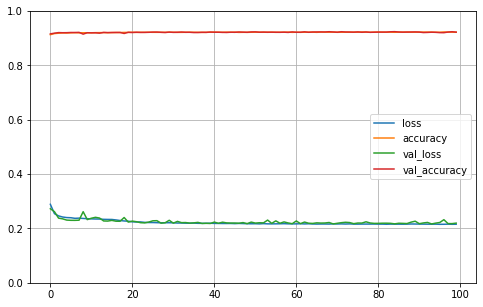

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("model_exp1.h5")

## Experiment 2

In [ ]:
LAYERS = [
          tf.keras.layers.Dense(16,input_dim = 23,activation='relu',name = 'hidden_layer1'),
          tf.keras.layers.Dense(16,activation='relu',name='hidden_layer2'),
          tf.keras.layers.Dense(8,activation='relu',name='hidden_layer3'),
          tf.keras.layers.Dense(1,activation='sigmoid',name = 'output_layer')
]

model = tf.keras.models.Sequential(LAYERS)

In [ ]:
model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 16)                384       
                                                                 
 hidden_layer2 (Dense)       (None, 16)                272       
                                                                 
 hidden_layer3 (Dense)       (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LOSS_FUNC = "binary_crossentropy"
OPTIMISER = "adam"
METRICS = ['accuracy']

In [ ]:
model.compile(loss=LOSS_FUNC,optimizer = OPTIMISER, metrics = METRICS)

In [ ]:
EPOCHS = 300
VAL_SET = (X_valid,y_valid)

history = model.fit(X_train,y_train,
                    epochs = EPOCHS,
                    validation_data=VAL_SET)

Epoch 1/300
1828/1828 [==============================] - 9s 4ms/step - loss: 0.3112 - accuracy: 0.9136 - val_loss: 0.2490 - val_accuracy: 0.9198
Epoch 2/300
1828/1828 [==============================] - 7s 4ms/step - loss: 0.2525 - accuracy: 0.9188 - val_loss: 0.2359 - val_accuracy: 0.9208
Epoch 3/300
1828/1828 [==============================] - 11s 6ms/step - loss: 0.2463 - accuracy: 0.9193 - val_loss: 0.2310 - val_accuracy: 0.9218
Epoch 4/300
1828/1828 [==============================] - 9s 5ms/step - loss: 0.2430 - accuracy: 0.9187 - val_loss: 0.2485 - val_accuracy: 0.9198
Epoch 5/300
1828/1828 [==============================] - 7s 4ms/step - loss: 0.2431 - accuracy: 0.9192 - val_loss: 0.2328 - val_accuracy: 0.9205
Epoch 6/300
1828/1828 [==============================] - 7s 4ms/step - loss: 0.2388 - accuracy: 0.9203 - val_loss: 0.2361 - val_accuracy: 0.9208
Epoch 7/300
1828/1828 [==============================] - 10s 6ms/step - loss: 0.2386 - accuracy: 0.9199 - val_loss: 0.2296 - val_

In [ ]:
model.evaluate(X_test,y_test)

717/717 [==============================] - 2s 3ms/step - loss: 0.2190 - accuracy: 0.9211


[0.21899566054344177, 0.9210606813430786]

In [ ]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0    0.311153  0.913574  0.249015      0.919752
1    0.252525  0.918808  0.235906      0.920818
2    0.246341  0.919321  0.231035      0.921787
3    0.243010  0.918722  0.248506      0.919849
4    0.243142  0.919167  0.232814      0.920527
..        ...       ...       ...           ...
295  0.210721  0.924195  0.218327      0.922466
296  0.210904  0.923973  0.222839      0.921787
297  0.210628  0.923289  0.218172      0.922369
298  0.210757  0.923887  0.219412      0.921496
299  0.210874  0.924298  0.216653      0.922563

[300 rows x 4 columns]

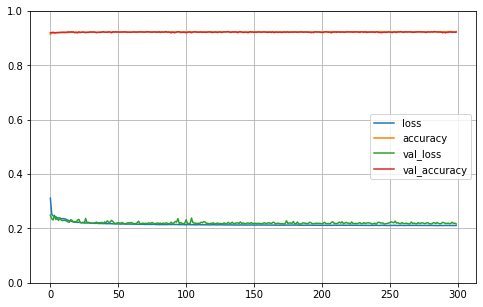

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("model_exp2.h5")

## Experiment 3:


In [22]:
LAYERS = [
          tf.keras.layers.Dense(16,input_dim = 23,activation='relu',name = 'hidden_layer1',kernel_initializer='he_uniform'),
          tf.keras.layers.Dense(32,activation='relu',name='hidden_layer2'),
          tf.keras.layers.Dense(18,activation='relu',name='hidden_layer3'),
          tf.keras.layers.Dense(12,activation='relu',name='hidden_layer4'),
          tf.keras.layers.Dense(1,activation='sigmoid',name = 'output_layer')
]

model = tf.keras.models.Sequential(LAYERS)

In [23]:
LOSS_FUNC = "binary_crossentropy"
OPTIMISER = keras.optimizers.Adam(learning_rate=0.01)
METRICS = ['accuracy']

In [24]:
model.compile(loss=LOSS_FUNC,optimizer = OPTIMISER, metrics = METRICS)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 16)                384       
                                                                 
 hidden_layer2 (Dense)       (None, 32)                544       
                                                                 
 hidden_layer3 (Dense)       (None, 18)                594       
                                                                 
 hidden_layer4 (Dense)       (None, 12)                228       
                                                                 
 output_layer (Dense)        (None, 1)                 13        
                                                                 
Total params: 1,763
Trainable params: 1,763
Non-trainable params: 0
_________________________________________________________________


In [26]:
EPOCHS = 100
VAL_SET = (X_valid,y_valid)

history = model.fit(X_train,y_train,
                    batch_size =32,
                    epochs = EPOCHS,
                    validation_data=VAL_SET)

Epoch 1/100
1828/1828 [==============================] - 9s 4ms/step - loss: 0.2313 - accuracy: 0.9190 - val_loss: 1.2393 - val_accuracy: 0.9158
Epoch 2/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2207 - accuracy: 0.9204 - val_loss: 1.2542 - val_accuracy: 0.9158
Epoch 3/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2192 - accuracy: 0.9216 - val_loss: 2.9224 - val_accuracy: 0.9158
Epoch 4/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2182 - accuracy: 0.9210 - val_loss: 1.8401 - val_accuracy: 0.9158
Epoch 5/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2176 - accuracy: 0.9215 - val_loss: 1.0557 - val_accuracy: 0.9158
Epoch 6/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2172 - accuracy: 0.9211 - val_loss: 0.7982 - val_accuracy: 0.9158
Epoch 7/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2168 - accuracy: 0.9217 - val_loss: 1.2743 - val_ac

In [27]:
model.evaluate(X_test,y_test)

717/717 [==============================] - 1s 2ms/step - loss: 0.2252 - accuracy: 0.9202


[0.22521620988845825, 0.9201884269714355]

In [28]:
pd.DataFrame(history.history)

loss  accuracy   val_loss  val_accuracy
0   0.231323  0.919047   1.239253      0.915778
1   0.220720  0.920415   1.254205      0.915778
2   0.219244  0.921630   2.922365      0.915778
3   0.218186  0.921014   1.840075      0.915778
4   0.217599  0.921459   1.055703      0.915778
..       ...       ...        ...           ...
95  0.208475  0.922793  14.330976      0.915778
96  0.208956  0.922947  23.457747      0.915778
97  0.208796  0.923443   7.514781      0.915778
98  0.209078  0.922399  13.969350      0.915778
99  0.208503  0.922570  16.864546      0.915778

[100 rows x 4 columns]

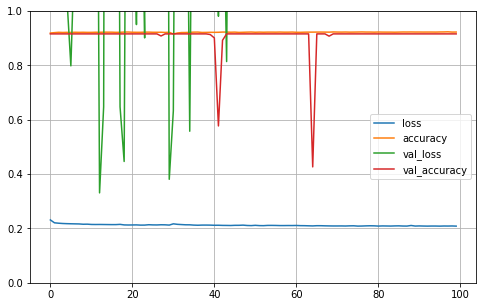

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
model.save('model_exp3.h5')

## Experiemnt 4

In [34]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [44]:
trainY= to_categorical(y_train)
validY = to_categorical(y_valid)

In [45]:
LAYERS = [
          tf.keras.layers.Dense(32,input_dim = 23,activation='relu',name = 'hidden_layer1',kernel_initializer='he_uniform'),
          tf.keras.layers.Dense(18,activation='relu',name='hidden_layer2'),
          tf.keras.layers.Dense(12,activation='relu',name='hidden_layer3'),
          tf.keras.layers.Dense(4,activation='relu',name='hidden_layer4'),
          tf.keras.layers.Dense(2,activation='softmax',name = 'output_layer')
]

model = tf.keras.models.Sequential(LAYERS)

In [51]:
LOSS_FUNC = "categorical_crossentropy"
OPTIMISER = keras.optimizers.Adam(learning_rate=0.01)
METRICS = ['accuracy']

In [52]:
model.compile(loss=LOSS_FUNC,optimizer = OPTIMISER, metrics = METRICS)

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 32)                768       
                                                                 
 hidden_layer2 (Dense)       (None, 18)                594       
                                                                 
 hidden_layer3 (Dense)       (None, 12)                228       
                                                                 
 hidden_layer4 (Dense)       (None, 4)                 52        
                                                                 
 output_layer (Dense)        (None, 2)                 10        
                                                                 
Total params: 1,652
Trainable params: 1,652
Non-trainable params: 0
_________________________________________________________________


In [54]:
EPOCHS = 100
VAL_SET = (X_valid,validY)

history = model.fit(X_train,trainY,
                    batch_size =32,
                    epochs = EPOCHS,
                    validation_data=VAL_SET)

Epoch 1/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2286 - accuracy: 0.9198 - val_loss: 0.2239 - val_accuracy: 0.9221
Epoch 2/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2200 - accuracy: 0.9210 - val_loss: 0.2197 - val_accuracy: 0.9225
Epoch 3/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2194 - accuracy: 0.9214 - val_loss: 0.2223 - val_accuracy: 0.9208
Epoch 4/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2191 - accuracy: 0.9217 - val_loss: 0.2186 - val_accuracy: 0.9224
Epoch 5/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2183 - accuracy: 0.9209 - val_loss: 0.2245 - val_accuracy: 0.9226
Epoch 6/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2176 - accuracy: 0.9208 - val_loss: 0.2235 - val_accuracy: 0.9215
Epoch 7/100
1828/1828 [==============================] - 4s 2ms/step - loss: 0.2170 - accuracy: 0.9214 - val_loss: 0.2264 - val_ac

In [56]:
testY = to_categorical(y_test)

In [57]:
model.evaluate(X_test,testY)

717/717 [==============================] - 1s 2ms/step - loss: 0.2271 - accuracy: 0.9196


[0.22705242037773132, 0.919621467590332]

In [58]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0   0.228578  0.919765  0.223915      0.922078
1   0.220010  0.920997  0.219724      0.922466
2   0.219391  0.921373  0.222273      0.920818
3   0.219128  0.921698  0.218564      0.922369
4   0.218324  0.920946  0.224459      0.922563
..       ...       ...       ...           ...
95  0.209554  0.922280  0.225751      0.921012
96  0.210347  0.922690  0.236881      0.921109
97  0.209018  0.922519  0.230361      0.920721
98  0.209582  0.922091  0.227786      0.917426
99  0.210397  0.921185  0.231314      0.920527

[100 rows x 4 columns]

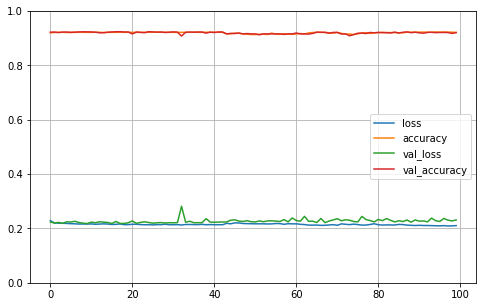

In [59]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [60]:
model.save('model_exp4.h5')

## Experient 5 - considering all the features

In [43]:
df_all_col = pd.read_csv('patient_cleaned.csv')

In [46]:
df_all_col.head(5)

hospital_death   age        bmi  elective_surgery  ethnicity  gender  \
0             0.0  68.0  22.730000               0.0        3.0     2.0   
1             0.0  77.0  27.420000               0.0        3.0     1.0   
2             0.0  25.0  31.950000               0.0        3.0     1.0   
3             0.0  81.0  22.640000               1.0        3.0     1.0   
4             0.0  19.0  29.185818               0.0        3.0     2.0   

   height  icu_admit_source  icu_stay_type  icu_type  pre_icu_los_days  \
0   180.3               2.0            1.0       3.0          0.541667   
1   160.0               2.0            1.0       6.0          0.927778   
2   172.7               1.0            1.0       6.0          0.000694   
3   165.1               3.0            1.0       3.0          0.000694   
4   188.0               1.0            1.0       6.0          0.073611   

     weight  apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
0  73.90000               113.0               502.01                    0.0   
1  70.20000               108.0               203.01                    0.0   
2  95.30000               122.0               703.03                    0.0   
3  61.70000               203.0              1206.03                    1.0   
4  84.02834               119.0               601.01                    0.0   

   arf_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
0         0.0         3.000000          6.000000           0.000000   
1         0.0         1.000000          3.000000           0.000000   
2         0.0         3.000000          6.000000           0.000000   
3         0.0         4.000000          6.000000           0.000000   
4         0.0         3.465049          5.471195           0.009528   

   gcs_verbal_apache  glucose_apache  heart_rate_apache  intubated_apache  \
0           4.000000      168.000000              118.0               0.0   
1           1.000000      145.000000              120.0               0.0   
2           5.000000      160.326822              102.0               0.0   
3           5.000000      185.000000              114.0               1.0   
4           3.994778      160.326822               60.0               0.0   

   map_apache  resprate_apache  temp_apache  ventilated_apache  d1_diasbp_max  \
0        40.0             36.0         39.3                0.0           68.0   
1        46.0             33.0         35.1                1.0           95.0   
2        68.0             37.0         36.7                0.0           88.0   
3        60.0              4.0         34.8                1.0           48.0   
4       103.0             16.0         36.7                0.0           99.0   

   d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  \
0           37.0                       68.0                       37.0   
1           31.0                       95.0                       31.0   
2           48.0                       88.0                       48.0   
3           42.0                       48.0                       42.0   
4           57.0                       99.0                       57.0   

   d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
0             119.0              72.0        89.0        46.0   
1             118.0              72.0       120.0        38.0   
2              96.0              68.0       102.0        68.0   
3             116.0              92.0        84.0        84.0   
4              89.0              60.0       104.0        90.0   

   d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  d1_resprate_max  \
0                    89.0                    46.0             34.0   
1                   120.0                    38.0             32.0   
2                   102.0                    68.0             21.0   
3                    84.0                    84.0             23.0   
4                   104.0                    90.0             18.0   

In [51]:
df_all_col.shape

(91713, 97)

In [47]:
X = df_all_col.drop(columns=['hospital_death'])
Y = df_all_col['hospital_death']

In [68]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.15,random_state=0)


In [59]:
X_train.shape

(58466, 96)

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [50]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [60]:
LAYERS = [
          tf.keras.layers.Dense(128,input_dim = 96,activation='relu',name = 'hidden_layer1',kernel_initializer='he_uniform'),
          tf.keras.layers.Dense(64,activation='relu',name='hidden_layer2'),
          tf.keras.layers.Dense(32,activation='relu',name='hidden_layer3'),
          tf.keras.layers.Dense(16,activation='relu',name='hidden_layer4'),
          tf.keras.layers.Dense(8,activation='relu',name='hidden_layer5'),
          tf.keras.layers.Dense(2,activation='softmax',name = 'output_layer')
]

model = tf.keras.models.Sequential(LAYERS)

LOSS_FUNC = "categorical_crossentropy"
OPTIMISER = keras.optimizers.Adam(learning_rate=0.01)
METRICS = ['accuracy']



In [61]:
model.compile(loss=LOSS_FUNC,optimizer = OPTIMISER, metrics = METRICS)

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 128)               12416     
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 hidden_layer3 (Dense)       (None, 32)                2080      
                                                                 
 hidden_layer4 (Dense)       (None, 16)                528       
                                                                 
 hidden_layer5 (Dense)       (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 2)                 18        
                                                                 
Total params: 23,434
Trainable params: 23,434
Non-trai

In [67]:
trainY= to_categorical(y_train)
validY = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [64]:
EPOCHS = 100
VAL_SET = (X_valid,validY)

history = model.fit(X_train,trainY,
                    batch_size =32,
                    epochs = EPOCHS,
                    validation_data=VAL_SET)

Epoch 1/100
1828/1828 [==============================] - 6s 3ms/step - loss: 0.2181 - accuracy: 0.9203 - val_loss: 0.2079 - val_accuracy: 0.9254
Epoch 2/100
1828/1828 [==============================] - 5s 3ms/step - loss: 0.2035 - accuracy: 0.9245 - val_loss: 0.2033 - val_accuracy: 0.9285
Epoch 3/100
1828/1828 [==============================] - 5s 3ms/step - loss: 0.2040 - accuracy: 0.9246 - val_loss: 0.2064 - val_accuracy: 0.9281
Epoch 4/100
1828/1828 [==============================] - 5s 3ms/step - loss: 0.1973 - accuracy: 0.9276 - val_loss: 0.2354 - val_accuracy: 0.9172
Epoch 5/100
1828/1828 [==============================] - 5s 3ms/step - loss: 0.2089 - accuracy: 0.9162 - val_loss: 0.2105 - val_accuracy: 0.9242
Epoch 6/100
1828/1828 [==============================] - 5s 3ms/step - loss: 0.2047 - accuracy: 0.9183 - val_loss: 0.2035 - val_accuracy: 0.9226
Epoch 7/100
1828/1828 [==============================] - 5s 3ms/step - loss: 0.2081 - accuracy: 0.9162 - val_loss: 0.2128 - val_ac

In [69]:
testY = to_categorical(y_test)

In [70]:
model.evaluate(X_test,testY)

717/717 [==============================] - 2s 2ms/step - loss: 0.3198 - accuracy: 0.9103


[0.31981417536735535, 0.9102882742881775]

In [71]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0   0.218103  0.920330  0.207857      0.925373
1   0.203484  0.924469  0.203342      0.928474
2   0.204036  0.924623  0.206361      0.928087
3   0.197311  0.927599  0.235364      0.917232
4   0.208900  0.916191  0.210542      0.924210
5   0.204727  0.918329  0.203454      0.922563
6   0.208054  0.916225  0.212823      0.915778
7   0.212729  0.914651  0.268347      0.915778
8   0.209683  0.914412  0.207424      0.915778
9   0.200843  0.915387  0.206156      0.915778
10  0.195476  0.921561  0.204577      0.927796
11  0.190951  0.923545  0.206888      0.920915
12  0.186864  0.928112  0.204594      0.925373
13  0.181713  0.930045  0.212255      0.924113
14  0.177227  0.931567  0.206965      0.922272
15  0.176892  0.931567  0.213865      0.916360
16  0.178872  0.924554  0.272221      0.915778
17  0.172798  0.931105  0.243714      0.919752
18  0.173635  0.927206  0.231518      0.917620
19  0.169020  0.931533  0.224142      0.912580
20  0.170143  0.927633  0.271822      0.920527
21  0.165546  0.931721  0.234124      0.912968
22  0.161212  0.933671  0.232387      0.924307
23  0.155926  0.936134  0.236823      0.921884
24  0.161982  0.931276  0.248984      0.917038
25  0.155036  0.936305  0.227576      0.915778
26  0.162958  0.933329  0.250083      0.915875
27  0.154563  0.935706  0.256012      0.918395
28  0.151628  0.934543  0.241250      0.905990
29  0.152146  0.936955  0.232186      0.924985
30  0.151495  0.937194  0.253768      0.914906
31  0.144122  0.939931  0.283713      0.917814
32  0.146830  0.936476  0.308515      0.912386
33  0.142726  0.939520  0.247815      0.915100
34  0.140447  0.939572  0.353242      0.914421
35  0.150609  0.926573  0.341488      0.915778
36  0.169256  0.920313  0.323513      0.911320
37  0.151361  0.930763  0.269105      0.888544
38  0.146389  0.935022  0.328678      0.917232
39  0.147239  0.937160  0.258210      0.912677
40  0.139640  0.938888  0.254715      0.916457
41  0.145820  0.937485  0.276440      0.907153
42  0.142457  0.937690  0.258106      0.915197
43  0.138944  0.940410  0.302124      0.916554
44  0.136602  0.936938  0.291890      0.897073
45  0.137087  0.938836  0.254815      0.910254
46  0.132002  0.938032  0.322099      0.923629
47  0.163893  0.929121  0.256671      0.909091
48  0.222967  0.923785  0.256455      0.921303
49  0.235989  0.923289  0.255292      0.915584
50  0.250692  0.922536  0.262411      0.912386
51  0.236993  0.923819  0.256057      0.914421
52  0.241223  0.923614  0.256453      0.913355
53  0.240518  0.923545  0.254929      0.913355
54  0.244338  0.920706  0.246891      0.901725
55  0.235731  0.914207  0.247542      0.915778
56  0.235207  0.914668  0.244641      0.915778
57  0.233219  0.914668  0.244070      0.915778
58  0.233603  0.914668  0.245743      0.915778
59  0.235374  0.915421  0.243682      0.915778
60  0.234482  0.914668  0.241699      0.915778
61  0.234237  0.914668  0.242152      0.915778
62  0.234264  0.914668  0.242885      0.915778
63  0.234387  0.914668  0.247398      0.915778
64  0.234428  0.914668  0.243637      0.915778
65  0.234401  0.914668  0.241944      0.915778
66  0.234251  0.914668  0.242296      0.915778
67  0.234202  0.914668  0.242155      0.915778
68  0.234399  0.914668  0.242814      0.915778
69  0.234183  0.914668  0.242513      0.915778
70  0.234158  0.914668  0.241773      0.915778
71  0.234311  0.914668  0.242459      0.915778
72  0.234262  0.914668  0.243390      0.915778
73  0.234279  0.914668  0.241992      0.915778
74  0.234290  0.914668  0.243062      0.915778
75  0.234378  0.914668  0.241994      0.915778
76  0.234443  0.914668  0.241322      0.915778
77  0.234359  0.914668  0.243362      0.915778
78  0.234264  0.914668  0.242218      0.915778
79  0.234083  0.914668  0.241990      0.915778
80  0.234138  0.914668  0.242318      0.915778
81  0.234314  0.914668  0.242047      0.915778
82  0.234289  0.914668  0.242408      0.915778
83  0.234161  0.914668  0.241715      0.915778
84  0.234340 

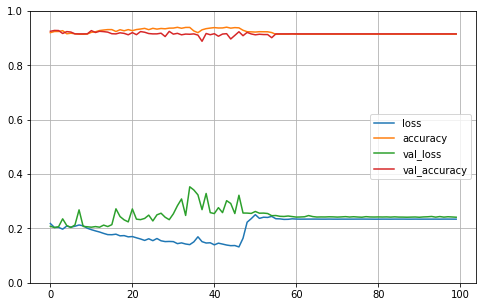

In [72]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [73]:
model.save('model_exp5.h5')

In [75]:
from keras.callbacks import ModelCheckpoint

In [83]:
checkpoint = ModelCheckpoint('model_chk_pt.h5', monitor='val_accuracy', verbose=3, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [84]:
LAYERS = [
          tf.keras.layers.Dense(128,input_dim = 96,activation='relu',name = 'hidden_layer1',kernel_initializer='he_uniform'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(64,activation='relu',name='hidden_layer2'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(32,activation='relu',name='hidden_layer3'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(16,activation='relu',name='hidden_layer4'),
          tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(8,activation='relu',name='hidden_layer5'),
          tf.keras.layers.Dense(2,activation='softmax',name = 'output_layer')
]

model = tf.keras.models.Sequential(LAYERS)

LOSS_FUNC = "categorical_crossentropy"
OPTIMISER = keras.optimizers.Adam(learning_rate=0.01)
METRICS = ['accuracy']


In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 128)               12416     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 hidden_layer3 (Dense)       (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 hidden_layer4 (Dense)       (None, 16)               

In [86]:
model.compile(loss=LOSS_FUNC,optimizer = OPTIMISER, metrics = METRICS)

In [87]:
EPOCHS = 300
VAL_SET = (X_valid,validY)

history = model.fit(X_train,trainY,
                    batch_size =32,
                    epochs = EPOCHS,
                    validation_data=VAL_SET,
                    callbacks=callbacks_list)

Epoch 1/300
1810/1828 [============================>.] - ETA: 0s - loss: 0.6040 - accuracy: 0.9100
Epoch 1: val_accuracy improved from -inf to 0.91578, saving model to model_chk_pt.h5
1828/1828 [==============================] - 18s 9ms/step - loss: 0.6011 - accuracy: 0.9101 - val_loss: 0.2890 - val_accuracy: 0.9158
Epoch 2/300
1810/1828 [============================>.] - ETA: 0s - loss: 0.2940 - accuracy: 0.9145
Epoch 2: val_accuracy did not improve from 0.91578
1828/1828 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.9145 - val_loss: 0.2890 - val_accuracy: 0.9158
Epoch 3/300
1825/1828 [============================>.] - ETA: 0s - loss: 0.2984 - accuracy: 0.9146
Epoch 3: val_accuracy did not improve from 0.91578
1828/1828 [==============================] - 5s 3ms/step - loss: 0.2985 - accuracy: 0.9145 - val_loss: 0.2906 - val_accuracy: 0.9158
Epoch 4/300
1816/1828 [============================>.] - ETA: 0s - loss: 0.2951 - accuracy: 0.9145
Epoch 4: val_accu

In [88]:
model.evaluate(X_test,testY)

717/717 [==============================] - 1s 2ms/step - loss: 0.3020 - accuracy: 0.9103


[0.30201053619384766, 0.9102882742881775]

In [89]:
pd.DataFrame(history.history)

loss  accuracy  val_loss  val_accuracy
0    0.601057  0.910050  0.289034      0.915778
1    0.293953  0.914514  0.288965      0.915778
2    0.298473  0.914514  0.290572      0.915778
3    0.294948  0.914583  0.289039      0.915778
4    0.291818  0.914668  0.288968      0.915778
5    0.299666  0.914617  0.290350      0.915778
6    0.293763  0.914668  0.289066      0.915778
7    0.291870  0.914668  0.288999      0.915778
8    0.291898  0.914668  0.288977      0.915778
9    0.291849  0.914668  0.288962      0.915778
10   0.291765  0.914668  0.288965      0.915778
11   0.291901  0.914668  0.288972      0.915778
12   0.292154  0.914668  0.289411      0.915778
13   0.297149  0.914651  0.289442      0.915778
14   0.368376  0.914600  0.288972      0.915778
15   0.291847  0.914668  0.289044      0.915778
16   0.291889  0.914668  0.289554      0.915778
17   0.291841  0.914668  0.288987      0.915778
18   0.291877  0.914668  0.289158      0.915778
19   0.291859  0.914668  0.289084      0.915778
20   0.291843  0.914668  0.288993      0.915778
21   0.291929  0.914668  0.289358      0.915778
22   0.291863  0.914668  0.288962      0.915778
23   0.291817  0.914668  0.288969      0.915778
24   0.291758  0.914668  0.288963      0.915778
25   0.291850  0.914668  0.289280      0.915778
26   0.291877  0.914668  0.289179      0.915778
27   0.291885  0.914668  0.289004      0.915778
28   0.291927  0.914668  0.288987      0.915778
29   0.291870  0.914668  0.288962      0.915778
30   0.291878  0.914668  0.288980      0.915778
31   0.291886  0.914668  0.289455      0.915778
32   0.291840  0.914668  0.289348      0.915778
33   0.291811  0.914668  0.290537      0.915778
34   0.291886  0.914668  0.289283      0.915778
35   0.291886  0.914668  0.289036      0.915778
36   0.291810  0.914668  0.289121      0.915778
37   0.291869  0.914668  0.289019      0.915778
38   0.291770  0.914668  0.289030      0.915778
39   0.291800  0.914668  0.289037      0.915778
40   0.291800  0.914668  0.288962      0.915778
41   0.291907  0.914668  0.289137      0.915778
42   0.291815  0.914668  0.288964      0.915778
43   0.291814  0.914668  0.289093      0.915778
44   0.291854  0.914668  0.289975      0.915778
45   0.291831  0.914668  0.289399      0.915778
46   0.291787  0.914668  0.289038      0.915778
47   0.291940  0.914668  0.288968      0.915778
48   0.291837  0.914668  0.288975      0.915778
49   0.291876  0.914668  0.289421      0.915778
50   0.291954  0.914668  0.289196      0.915778
51   0.291869  0.914668  0.289191      0.915778
52   0.291907  0.914668  0.288991      0.915778
53   0.291831  0.914668  0.288991      0.915778
54   0.291894  0.914668  0.289073      0.915778
55   0.291886  0.914668  0.289669      0.915778
56   0.291890  0.914668  0.289036      0.915778
57   0.291790  0.914668  0.290056      0.915778
58   0.291890  0.914668  0.289343      0.915778
59   0.291872  0.914668  0.289066      0.915778
60   0.291805  0.914668  0.289502      0.915778
61   0.291872  0.914668  0.289137      0.915778
62   0.291836  0.914668  0.289473      0.915778
63   0.291944  0.914668  0.288989      0.915778
64   0.291817  0.914668  0.288994      0.915778
65   0.291872  0.914668  0.288968      0.915778
66   0.291824  0.914668  0.288961      0.915778
67   0.291803  0.914668  0.289145      0.915778
68   0.291883  0.914668  0.290553      0.915778
69   0.291869  0.914668  0.288981      0.915778
70   0.291829  0.914668  0.289019      0.915778
71   0.291824  0.914668  0.289287      0.915778
72   0.291828  0.914668  0.289450      0.915778
73   0.291736  0.914668  0.289032      0.915778
74   0.291845  0.914668  0.289627      0.915778
75   0.291851  0.914668  0.288962      0.915778
76   0.291852  0.914668  0.289164      0.915778
77   0.291888  0.914668  0.288986      0.915778
78   0.291881  0.914668  0.288993      0.915778
79   0.291966  0.914668  0.288967      0.915778
80   0.291888  0.914668  0.289088      0.915778
81   0.291886  0.914668  0.288963      0.915778
82   0.291740  0.914668  

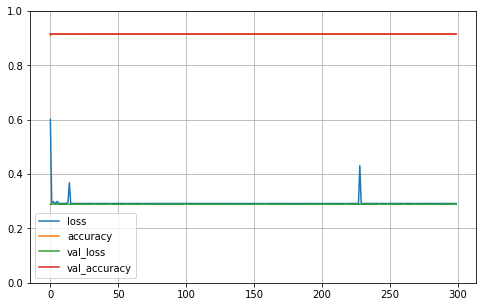

In [90]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor    

# def calculate_vif_(X, thresh=5.0):
#     variables = list(range(X.shape[1]))
#     dropped = True
#     while dropped:
#         dropped = False
#         vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
#         maxloc = vif.index(max(vif))
#         if max(vif) > thresh:
#             print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
#                   '\' at index: ' + str(maxloc))
#             del variables[maxloc]
#             dropped = True

#     print('Remaining variables:')
#     print(X.columns[variables])
#     return X.iloc[:, variables]